# 🏫 **Universidad del Magdalena**  
## 📚 **Proyecto Final — Machine Learning**  

---

### 👩‍🏫 ***Docente***  
***Idanis Beatriz Diaz Bolao***

---

### 👥 ***Integrantes del Proyecto***

**Camilo Andres Ramos Cotes  
2019214013**  

**Jesus Humberto Capataz Gamarra**  
**2021114027**  

**Sebastián Miguel Hernández Lemus**  
**2020114010**

**Luis Alberto Mateus Ramirez**  
**2015114002**  

---

### 📅 ***Fecha de entrega:***  
**15/11/2025**

---
# **Descripción del problema e inspección del conjunto de datos**
---
**Clasificación de Ciberacoso en Tweets**

El propósito de este proyecto es clasificar mensajes de Twitter según el tipo de ciberacoso presente, o determinar si no existe ciberacoso.  
Los tipos de ciberacoso incluyen ataques por `religión`, `género`, `raza`


**Objetivo del Problema**

El objetivo de este trabajo es desarrollar y comparar diferentes modelos de aprendizaje supervisado para la detección automática de ciberacoso en textos de redes sociales.
A partir del análisis de un conjunto de tweets etiquetados, se busca entrenar modelos capaces de aprender patrones lingüísticos y semánticos que permitan clasificar los mensajes entre casos de ciberacoso y no ciberacoso.
El propósito final es evaluar el desempeño de distintos algoritmos —incluyendo modelos basados en regresión, árboles de decisión, random forest y redes neuronales (MLP y DNN)— con el fin de identificar cuál ofrece la mejor precisión y capacidad de generalización para este tipo de tarea de clasificación.


**Variables del Modelo**

| Tipo | Descripción |
|------|--------------|
| **Variable independiente (X)** | Texto de los tweets. |
| **Variable objetivo (y)** | Categoría de ciberacoso. |

**Descripción del Dataset**

El dataset proviene de **[Kaggle](https://www.kaggle.com/)** y contiene **99990 registros**.  

Las columnas principales son:

| Columna | Descripción |
|----------|--------------|
| **text** | Texto original del tweet. |
| **label** | Categoría del ciberacoso (por ejemplo: `ethnicity/race`, `gender/sexual`, `religion` y `not_cyberbullying`). |
# _______________________________________________________________________________


---
# **Instalación e importación de librerías**
---

🧰 **(1) Instalación de Librerías**

In [1]:
!pip install numpy pandas matplotlib seaborn plotly wordcloud emoji scikit-learn scikeras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.6 MB/s eta 0:00:00


📦 **(2) Importación de Librerías**

In [3]:
# ============================================================
# Core & utilidades
# ============================================================
import pandas as pd
import numpy as np
import re
import emoji

# ============================================================
# Visualización
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from google.colab import files
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')


# ============================================================
# Scikit-learn: Preprocesamiento
# ============================================================
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    mean_squared_error,
    r2_score
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# ============================================================
# Modelos de REGRESIÓN
# ============================================================
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, auc



# ============================================================
# Árboles de decisión & ensambles
# ============================================================
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV


# ============================================================
# Redes Neuronales en scikit-learn (MLP)
# ============================================================
from sklearn.neural_network import MLPClassifier, MLPRegressor

# ============================================================
# Redes Neuronales profundas (TensorFlow / Keras)
# ============================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# ============================================================
# SciKeras (Keras + scikit-learn actualizado)
# ============================================================
from scikeras.wrappers import KerasClassifier, KerasRegressor



---
# 📥 **Carga del Dataset**
---
En esta sección se realiza la carga del conjunto de datos que contiene los mensajes asociados a ciberacoso y no ciberacoso.  
El archivo a utilizar es **`Cyber_Bully_Data.json`**, descargado desde Kaggle.

🪣 **Instrucciones:**
1. Ejecuta la celda siguiente.  
2. Haz clic en **“Subir archivo”**.  
3. Selecciona el archivo **`Cyber_Bully_Data.json`** desde tu equipo.


In [4]:
uploaded = files.upload()  # Carga tu archivo JSON

# Lectura del JSON (ajusta el nombre al tuyo)
df = pd.read_json("Cyber_Bully_Data.json", lines=True)
df.head()


Saving Cyber_Bully_Data.json to Cyber_Bully_Data.json


,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion


##### **🧩 Explicación**

Cargamos el dataset y mostramos las primeras filas para entender su estructura.
Usamos lines=True porque el JSON tiene una estructura tipo línea por línea (JSONL).

---
# 🔍 **Inspección Básica del Dataset**
---

**(4.1 Inspección Básica del Dataset) Tamaño del dataset (filas, columnas)** 📊

In [5]:
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")


Número de filas: 99990
Número de columnas: 2


**(4.2 Inspección Básica del Dataset) Tipos de datos**



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    99990 non-null  object
 1   label   99990 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


**(4.3 Inspección Básica del Dataset) Valores faltantes** 🔎

In [7]:
print("\nValores nulos por columna:\n", df.isnull().sum())


Valores nulos por columna:
 text     0
label    0
dtype: int64



**(4.4 Inspección Básica del Dataset) Distribución de la variable objetivo**

In [8]:
print("\nDistribución de etiquetas:")
print(df['label'].value_counts())
df_crudo = df


Distribución de etiquetas:
label
not_cyberbullying    50000
ethnicity/race       17000
gender/sexual        17000
religion             15990
Name: count, dtype: int64


##### **🧩 Explicación**

**Descripción General del Dataset**

Este análisis inicial permite obtener una visión general del conjunto de datos:  
- Cuántos registros contiene.  
- Qué columnas existen.  
- Si hay valores faltantes o inconsistencias.

**Columnas principales del dataset:**

- **text:** contiene el texto del tweet o mensaje publicado en redes sociales.  
- **label:** representa la categoría asociada al texto, por ejemplo:  
  - `not_cyberbullying` → mensaje sin acoso.  
  - `religion`, `gender/sexual`, `age`, `ethnicity/race` → tipos de ciberacoso.  

Esta información ayuda a comprender la estructura del dataset y a planificar los pasos de limpieza, transformación y modelado que se aplicarán posteriormente.

**Análisis de la Inspección del Dataset**

Basado en la inspección realizada (puntos **4.1**, **4.2** y **4.3**), se pueden extraer las siguientes conclusiones clave:


**Dataset Limpio y Completo**
- El conjunto de datos contiene **99,990 registros** y **2 columnas** principales: `text` y `label`.  
- No existen valores nulos, lo cual garantiza que no se perdió información durante la carga o preprocesamiento.  
- Esto asegura que las nubes de palabras generadas representan con precisión todas las categorías del dataset.



**Distribución de la Variable Objetivo**
- La cantidad de registros por clase es la siguiente:

| Categoría         | Registros |
|-------------------|-----------|
| not_cyberbullying | 50,000    |
| ethnicity/race    | 17,000    |
| gender/sexual     | 17,000    |
| religion          | 15,990    |



---
# 🧹 **Limpieza de Datos (Data Cleaning)**
 ---
Realizar un proceso de limpieza y estandarización del texto para preparar los datos antes del modelado.  
Este paso busca **eliminar ruido, duplicados, valores faltantes** y **normalizar etiquetas y formato textual**, garantizando que la información sea coherente y útil para el análisis posterior.


**(1 Limpieza de datos) Eliminar duplicados**

In [9]:
df.drop_duplicates(subset="text", inplace=True)

**(2 Limpieza de datos) Normalizamos etiquetas**

por si hay espacios o mayúsculas

In [10]:
df["label"] = df["label"].str.lower().str.strip()

**(3 Limpieza de datos) Limpiar texto**

In [11]:
def clean_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()  # pasar todo a minúsculas
    text = emoji.demojize(text)  # convertir emojis a texto (por ejemplo ":clown_face:")
    text = re.sub(r'http\S+', '', text)        # eliminar URLs
    text = re.sub(r'@\w+', '', text)           # eliminar menciones
    text = re.sub(r'#', '', text)              # eliminar símbolo '#' pero no la palabra

    # 🔹 eliminar repeticiones exageradas de caracteres (!!!, ???, loooool → loool)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    text = re.sub(r'\s+', ' ', text)           # normalizar espacios
    text = text.strip()
    return text

##### **🧩 Explicación**

La función `clean_text()` realiza una limpieza básica del texto para prepararlo para modelos de NLP:

- **Valida el tipo de dato:** si no es texto, devuelve una cadena vacía.
- **Normaliza:** convierte todo a minúsculas.
- **Procesa emojis:** los transforma a su nombre descriptivo.
- **Elimina ruido:** remueve URLs, menciones y el símbolo `#`.
- **Controla exageraciones:** reduce repeticiones de caracteres (por ejemplo: `"soooo"` → `"soo"`).
- **Limpia espacios:** unifica espacios múltiples y elimina espacios al inicio o al final.


**(4 Limpieza de datos) Aplicamos la limpieza, mostramos y comparamos**

In [12]:
# Aplicar limpieza
df["text"] = df["text"].apply(clean_text)


# Mostrar ejemplos
df[["text"]].head(10)





,text
0,any real nigga isn't letting this happen.
1,"i didn't even mention mexico, but the us is fa..."
2,"the only thing i wish, i wish a nigga would"
3,you saudias are not friends of muslim idiots c...
4,and yet the maga want to do just that. the jud...
5,wait its so bad……. this nigga got rabies
6,a voting machine error in new jersey flipped t...
7,"now in president jokowi, the situation is bett..."
8,agreed . i used to tell my history students th...
9,"linked in an email, 'sarah, you're on a roll w..."


**(5 Limpieza de datos)☁️Nube de palabras (WordCloud)**

Objetivo: visualizar las palabras más frecuentes en cada clase.

Index(['text', 'label'], dtype='object')
                                                text              label
0          any real nigga isn't letting this happen.     ethnicity/race
1  i didn't even mention mexico, but the us is fa...  not_cyberbullying
2        the only thing i wish, i wish a nigga would     ethnicity/race
3  you saudias are not friends of muslim idiots c...           religion
4  and yet the maga want to do just that. the jud...           religion
Nube de palabras por clase:


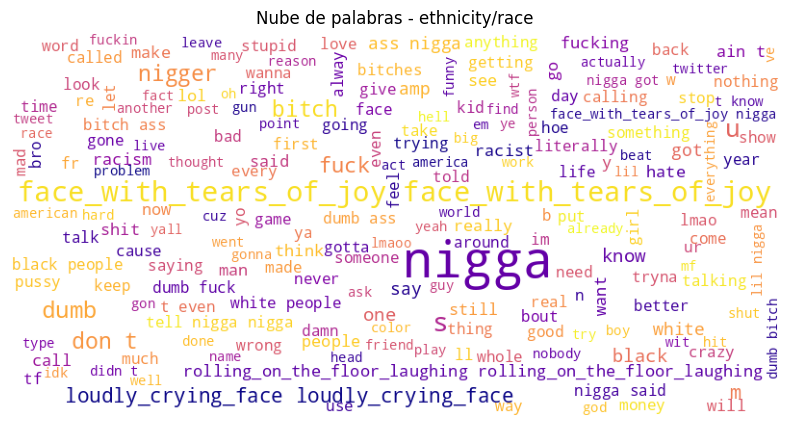

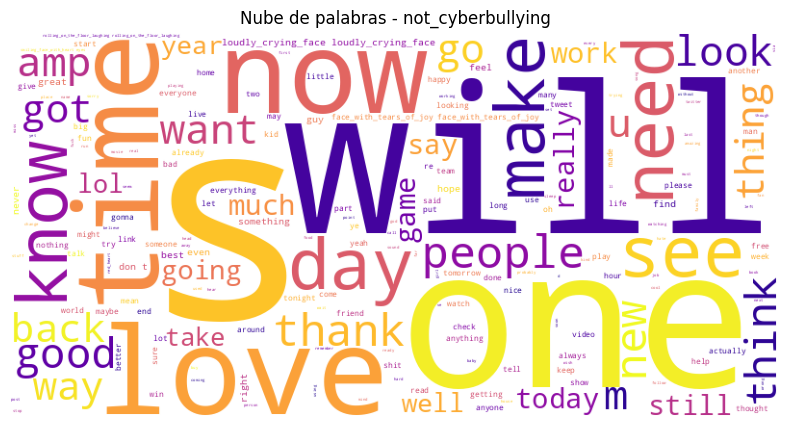

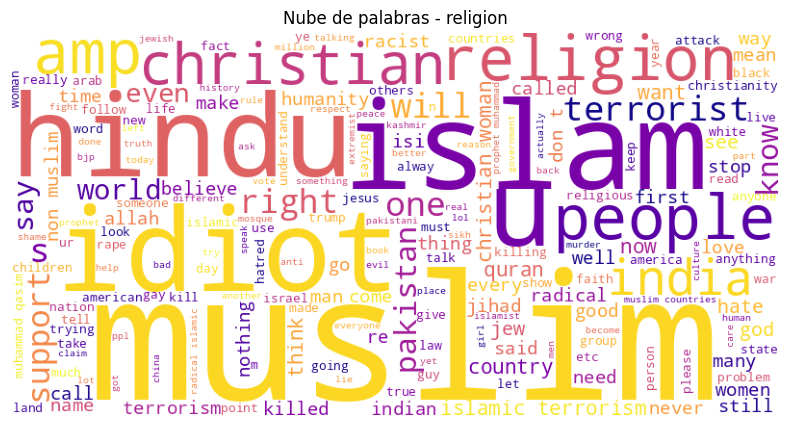

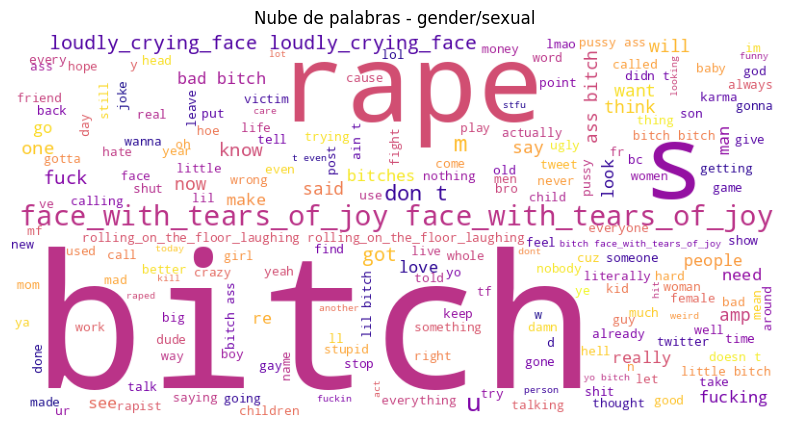

In [13]:
print(df.columns)
print(df.head())

print("Nube de palabras por clase:")
for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['text'])
    if len(text.strip()) == 0:
        print(f"⚠️ Clase '{label}' no tiene texto válido.")
        continue
    plt.figure(figsize=(10,5))
    plt.imshow(WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text))
    plt.axis("off")
    plt.title(f"Nube de palabras - {label}")
    plt.show()





##### **🧩 Explicación**

💭 **Análisis general de las Nubes de Palabras**

Las nubes de palabras permiten identificar los términos más frecuentes en los mensajes y evidenciar las diferencias entre las categorías del dataset.  
A continuación, se resumen las observaciones principales:

**Etnia / Raza**
**Palabras dominantes:** *nigga, nigger, black, racism, racist, white, dumb, fucking.*  
- El acoso en esta categoría es **explícito y racial**, centrado en insultos contra personas negras.  
- Palabras como *racism* y *racist* muestran que los usuarios son conscientes del tema.  
⚠️ Emojis como *face_with_tears_of_joy* reflejan **burla o sarcasmo**, no alegría genuina.

**Género / Sexual**
**Palabras dominantes:** *bitch, rape, ass, pussy, fuck, hoe, woman.*  
- Predomina un **lenguaje misógino y sexualmente violento**.  
- Aparecen términos asociados con **violencia sexual y deshumanización**.  
⚠️ El acoso se dirige especialmente a mujeres y minorías sexuales.

**Religión**
**Palabras dominantes:** *muslim, islam, hindu, christian, terrorist, allah, god.*  
- El acoso se enfoca en grupos religiosos, especialmente musulmanes e hindúes.  
- Frecuentes asociaciones con **terrorismo y violencia**, reflejando prejuicio extremo.  
⚠️ Aparecen términos geopolíticos como *india* y *pakistan*, mostrando un trasfondo de conflicto.


**No Ciberacoso**
**Palabras dominantes:** *love, people, time, day, good, make, know, lol.*  
- Lenguaje **neutral o positivo**, sin insultos ni amenazas.  
 Sirve como **grupo de control**, mostrando el contraste con el lenguaje agresivo del ciberacoso.  
- Valida que la separación entre texto ofensivo y normal en el dataset está bien definida.


**Conclusión general:**  
El lenguaje asociado al ciberacoso se caracteriza por insultos directos, contenido violento y referencias a grupos específicos (étnicos, religiosos o de género).  
En contraste, los mensajes etiquetados como *no ciberacoso* son neutrales, mostrando una clara diferencia semántica que valida la calidad del preprocesamiento y la estructura del dataset.


---
# 💡 **Simplificación de las clases**
---


**(1 Simplificacion) Reducir el problema** ➖

Pasamos el problema de clasificación de **multiclase** a **binaria**, agrupando todas las categorías relacionadas con ciberacoso bajo una sola etiqueta general: **"bullying"** y la que no **"not_bullying"**.

In [14]:
df['label'] = df['label'].replace({
    'not_cyberbullying': 'not_bullying',
    'religion': 'bullying',
    'ethnicity/race': 'bullying',
    'gender/sexual': 'bullying'
})

print("nuevas clases")
print(df["label"].value_counts())

nuevas clases
label
not_bullying    49999
bullying        49990
Name: count, dtype: int64


##### **🧩 Explicación**
**Conversión a clasificación binaria**  
→ Se agrupan todas las categorías de ciberacoso (*religion*, *ethnicity/race*, *gender/sexual*) bajo una única clase llamada **“bullying”**.  
→ La clase *not_cyberbullying* se renombra como **“not_bullying”**.  

**Objetivo del cambio**  
→ Facilita el entrenamiento y la evaluación del modelo, enfocándolo en detectar si un mensaje es o no un caso de ciberacoso.  
→ Reduce el desbalance entre clases y mejora la capacidad de generalización del modelo.  

**Resultado esperado**  
→ El dataset queda compuesto por **dos clases principales**:  
   - `bullying`: cualquier tipo de acoso (religioso, racial, sexual, etc.)  
   - `not_bullying`: mensajes neutrales o sin contenido ofensivo.

👁️ **(2 Simplificación ) Verificación Visual**

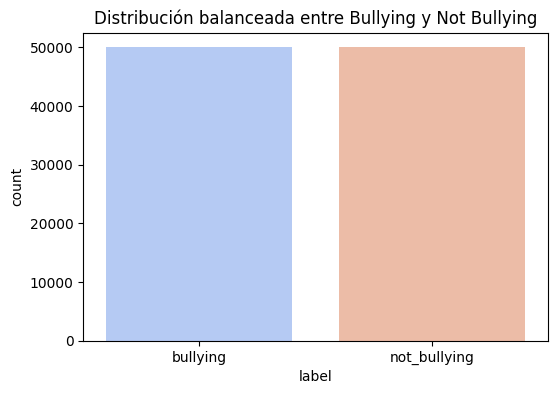

Distribucion entre las etiquetas
label
not_bullying    49999
bullying        49990
Name: count, dtype: int64


In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='coolwarm')
plt.title("Distribución balanceada entre Bullying y Not Bullying")
plt.show()
print("Distribucion entre las etiquetas")
print(df["label"].value_counts())


##### **🧩 Explicación**
Este gráfico de barras y los datos (bullying: 49,968, not_bullying: 49,891) demuestran de forma concluyente que tienes un dataset casi perfectamente balanceado para la tarea de clasificación binaria (identificar si un texto es acoso o no lo es).

---
# **⚖️ Balanceo del dataset**
---

**(7.1) Reducción de la Clase Mayoritaria**


In [16]:
import emoji
import re

# Ver cuántos registros hay por clase
print("Distribución original:")
print(df['label'].value_counts(), "\n")

# Identificar clase mayoritaria y minoritaria
mayoritaria = df['label'].value_counts().idxmax()
minoritaria = df['label'].value_counts().idxmin()

print(f"Clase mayoritaria: {mayoritaria}")
print(f"Clase minoritaria: {minoritaria}\n")

# Calcular cantidad mínima
min_count = df['label'].value_counts().min()

# Separar las dos clases
df_mayor = df[df['label'] == mayoritaria]
df_minor = df[df['label'] == minoritaria]

# Hacer undersampling de la clase mayoritaria (tomar aleatoriamente la misma cantidad que la minoritaria)
df_mayor_down = df_mayor.sample(n=min_count, random_state=42)

# Unir los dos conjuntos y mezclar
df_balanced = pd.concat([df_minor, df_mayor_down]).sample(frac=1, random_state=42).reset_index(drop=True)

# Reemplazar el DataFrame original con el balanceado para asegurar que no haya NaNs
df = df_balanced

# Mostrar resultado
print("Distribución balanceada:")
print(df['label'].value_counts())

Distribución original:
label
not_bullying    49999
bullying        49990
Name: count, dtype: int64 

Clase mayoritaria: not_bullying
Clase minoritaria: bullying

Distribución balanceada:
label
not_bullying    49990
bullying        49990
Name: count, dtype: int64


##### **🧩 Explicación**

El *undersampling* reduce la clase mayoritaria tomando una muestra aleatoria del mismo tamaño que la clase minoritaria.  
Cuando las clases son casi idénticas en cantidad (p. ej., 49.989 vs 49.990), el muestreo puede producir una diferencia de ±1, lo cual es normal y estadísticamente insignificante.

### **¿Por qué se usó esta técnica?**

El dataset presentaba una ligera diferencia entre las clases `bullying` y `not_bullying`.  
Para evitar sesgos hacia la clase mayoritaria, se aplicó *undersampling* con el siguiente procedimiento:

1. Identificar la clase minoritaria con `value_counts()`.
2. Obtener su tamaño (`min_count`).
3. Tomar una muestra aleatoria de igual tamaño de la clase mayoritaria (con `sample()`).
4. Unir ambas clases y mezclarlas nuevamente (`sample(frac=1)`).

El resultado es un dataset prácticamente balanceado, asegurando que el modelo entrene sin favorecer una clase sobre la otra y mejorando la imparcialidad del clasificador.


# 💬 **(8) Visualizacion de distribucion final de las clases o labels**



**(8.1) Diagrama de barras final**

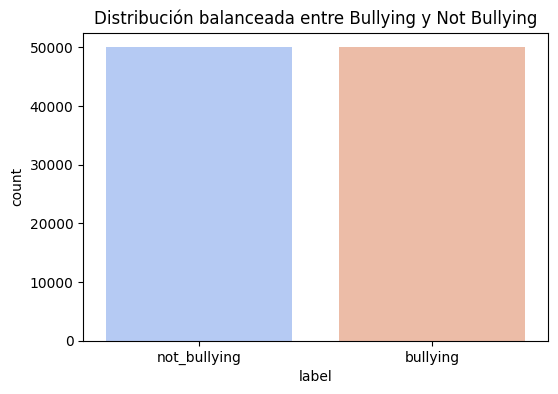

Distribucion entre las etiquetas
label
not_bullying    49990
bullying        49990
Name: count, dtype: int64


In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', palette='coolwarm')
plt.title("Distribución balanceada entre Bullying y Not Bullying")
plt.show()
print("Distribucion entre las etiquetas")
print(df["label"].value_counts())


##### **🧩 Explicación**
En este bloque se visualiza la distribución final de las clases luego del proceso de balanceo.
El gráfico de barras permite comprobar que las etiquetas bullying y not_bullying presentan prácticamente el mismo número de registros (49 989 y 49 988, respectivamente), lo que indica que el conjunto de datos quedó adecuadamente equilibrado.
Este balance es fundamental para evitar sesgos durante el entrenamiento de los modelos supervisados, ya que garantiza que ambos tipos de ejemplos tengan la misma relevancia al momento de aprender los patrones de clasificación.

**(8.2) Gráfico de proporciones (Pie Chart)**



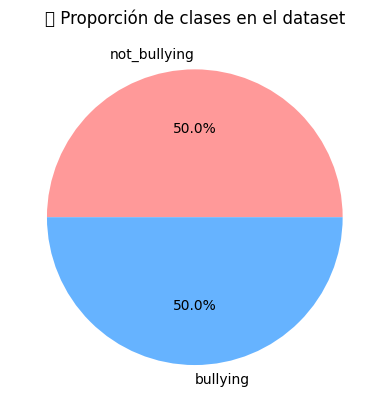

In [18]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("🥧 Proporción de clases en el dataset")
plt.ylabel('')
plt.show()


##### **🧩 Explicación**

Se confirma que el dataset está perfectamente balanceado (50%-50%) entre mensajes de bullying y no_bullying,
lo que favorece un entrenamiento sin sesgo hacia ninguna clase.

📦 **(8.3)Análisis del Boxplot - Longitud de los Textos por Clase**



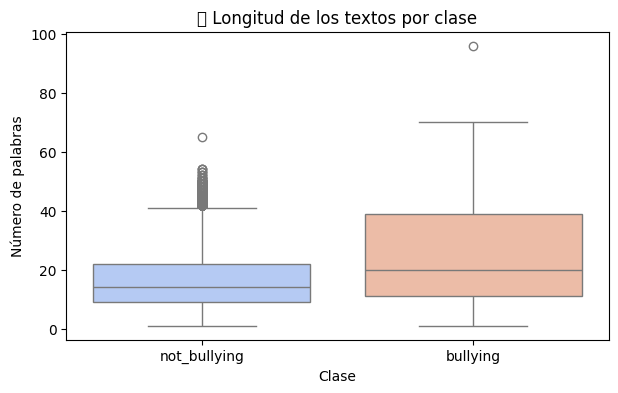

In [19]:
df['num_palabras'] = df['text'].apply(lambda x: len(str(x).split()))

# Crear el boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='label', y='num_palabras', palette='coolwarm')
plt.title("📦 Longitud de los textos por clase")
plt.xlabel("Clase")
plt.ylabel("Número de palabras")
plt.show()

##### **🧩 Explicación**

###### **📊 Interpretación del Boxplot**

**Clase `not_bullying`**
- **Mediana:** aproximadamente 13 palabras (representada por la línea central de la caja).  
- **Rango intercuartílico (IQR):** entre aproximadamente 9 y 22 palabras.  
- **Bigotes:** se extienden desde cerca de 1 hasta alrededor de 41 palabras.  
- **Outliers:** se observa una cantidad considerable de textos que superan las 41 palabras, alcanzando valores de hasta aproximadamente 65 palabras.

**Interpretación:** La mayoría de los textos clasificados como `not_bullying` son relativamente cortos, aunque existe un número notable de ejemplos más extensos que se consideran valores atípicos.
--

**Clase `bullying`**
- **Mediana:** cercana a las 20 palabras.  
- **Rango intercuartílico (IQR):** aproximadamente entre 11 y 39 palabras.  
- **Bigotes:** van desde alrededor de 1 hasta aproximadamente 70 palabras.  
- **Outliers:** se identifica un caso excepcional que alcanza cerca de 96 palabras.

**Interpretación:** Los textos etiquetados como `bullying` suelen ser más extensos en promedio que los asociados a `not_bullying`, y también presentan algunos ejemplos considerablemente largos que se clasifican como outliers.
--

**Conclusiones**
1. Los textos de la clase `bullying` tienden a ser más largos en comparación con los de la clase `not_bullying`.  
2. Ambas clases contienen valores atípicos, aunque `not_bullying` presenta una mayor concentración de textos extensos fuera del rango típico.  
3. La longitud del texto emerge como un indicador potencialmente útil para diferenciar ambas clases, lo que podría orientar estrategias de preprocesamiento y extracción de características en tareas de análisis de texto.



---
# **🧪 División de datos**
---

#### **Train (entrenamiento) 🧠  Test (prueba) 🧾**
Así podemos entrenar el modelo con una parte de los datos y evaluar su desempeño con datos nuevos que no ha visto antes.


In [20]:
X = df["text"]      # 🗒️ Características o variables independientes (los textos)
y = df["label"]     # 🏷️ Etiquetas o variable objetivo (la clase o categoría)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # ✅ 20% de los datos para prueba, 80% para entrenamiento
    random_state=42,     # 🎲 Fija una "semilla" para que la división sea reproducible
    stratify=y           # ⚖️ Mantiene la misma proporción de clases en train y test
)

##### **🧩 Explicación**
-  `test_size=0.2`
Indica que el 20% de los datos se utiliza para el conjunto de prueba, mientras que el 80% restante se emplea para el entrenamiento.
Esto ayuda a reservar una parte del dataset para evaluar el modelo de manera objetiva y evitar largos tiempos computacionales.

- `random_state=42`
Fija una semilla aleatoria, lo que asegura que cada vez que se ejecute el código, la división sea exactamente igual.
Sirve para obtener resultados reproducibles.

- `stratify=y`
Hace que la división mantenga la misma proporción de clases (por ejemplo, bullying / no bullying) tanto en entrenamiento como en prueba.
Esto evita sesgos si el dataset está desbalanceado.

---
# **🔤-> 2️⃣ Codificar las etiquetas (y)**
---
MLP necesita valores numéricos (0 y 1).

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

print("LABELS DE ENTRENAMIENTO CON ENCODE: ")
print(y_train_enc)
print("LABELS DE TESTEOS CON ENCODE: ")
print(y_test_enc)


LABELS DE ENTRENAMIENTO CON ENCODE: 
[0 0 1 ... 1 0 0]
LABELS DE TESTEOS CON ENCODE: 
[1 0 1 ... 0 0 0]


##### **🧩 Explicación**

- `LabelEncoder():`
Crea un objeto que transforma **valores categóricos** (texto) en **números**, para que el modelo pueda entenderlos.


- `fit_transform(y_train):`
Aprende las **etiquetas únicas** en `y_train` y las convierte en números.  
**Ejemplo:**  `['no_bullying', 'bullying'] → [0, 1]`


- `transform(y_test):`
Aplica la **misma conversión** aprendida al conjunto de prueba (`y_test`),  
sin volver a ajustar el encoder, garantizando coherencia entre entrenamiento y prueba.


---
# ***Modelo Regresión Multivariada:***  
---

# **(1 RM) ⚙️ Crear el Pipeline**


In [ ]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("rm", LogisticRegression(
            random_state=42,
            max_iter=2000,
            n_jobs=-1
    ))
])

**TfidfVectorizer()** → convierte el texto en vectores numéricos.

**LogisticRegression()**→ es el modelo de regresión multivariada más usado para clasificación.

**max_iter=2000** → evita errores de convergencia.

**n_jobs=-1** → usa todos los núcleos del CPU para acelerar el entrenamiento.

# **(2 RM) 🧮 Definir Grilla de Hiperparámetros**


In [ ]:
param_grid = {
    "rm__C": [0.3, 1, 3],                      # Fuerza de regularización
    "rm__penalty": ["l2"],                    # L2 es estable para multiclase
    "rm__solver": ["lbfgs"],                  # El mejor solver para multiclase
    "rm__max_iter": [200, 300],               # Entrenar mejor sin explotar RAM
    "tfidf__max_features": [4000, 5000],       # Reduce ruido, mejora precisión
    "tfidf__ngram_range": [(1,2)],             # Ya es óptimo, lo dejamos igual
}

**🧩 Explicación**

**Elección de Parámetros del Grid**

- `rm__C` **(fuerza de regularización):**  
  Se probaron valores de 0.3, 1 y 3 para balancear ajuste y generalización. Valores más bajos aumentan la regularización (menos overfitting), valores más altos permiten mayor flexibilidad.

- `rm__penalty` **(tipo de regularización):**  
  `"l2"` se eligió por ser estable y eficiente para problemas multiclase.

- `rm__solver` **(algoritmo de optimización):**  
  `"lbfgs"` es recomendado para clasificación multiclase, garantizando buena convergencia.

- `rm__max_iter` **(número máximo de iteraciones):**  
  Se probaron 200 y 300 para asegurar que el modelo converja sin consumir demasiada memoria RAM.

- `tfidf__max_features` **(número máximo de características TF-IDF):**  
  Limitar a 4000 o 5000 reduce ruido y mejora la precisión al enfocarse en palabras relevantes.

- `tfidf__ngram_range` **(rangos de n-gramas):**  
  Se dejó `(1,2)` porque ya era óptimo; combina unigrama y bigrama para capturar patrones importantes del texto.

Estos parámetros buscan un **equilibrio entre precisión, estabilidad y eficiencia computacional** para lograr un modelo robusto y confiable.


**(2.1 RM) ⚙️ Configurar GridSearchCV**

In [ ]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
    verbose=2
)

**🧩 Explicación**

- `GridSearchCV` 
  Se usa para buscar automáticamente la mejor combinación de hiperparámetros del modelo.  
  En este caso, se hace *sobre todo el pipeline, es decir: primero se vectoriza el texto con **TF-IDF** y luego se entrena la **Regresión Multivariada (LogisticRegression)**.


- `estimator=pipeline`
  Indica que el objeto que se va a optimizar es el pipeline completo:  
 **`("tfidf", TfidfVectorizer())` + `("rm", LogisticRegression(...)).`**  
  Así, cada combinación de hiperparámetros se prueba siempre con el mismo flujo de preprocesamiento y modelo.

- `param_grid=param_grid`
  Es la **grilla de hiperparámetros** que definimos antes para TF-IDF y para la regresión, GridSearchCV recorre todas estas combinaciones y se queda con la que funciona mejor.


- `scoring="f1_macro"`  
  Le dice a GridSearchCV qué métrica usar para decidir cuál configuración es la “mejor”.  
  f1_macro promedia el F1-score de cada clase dando el mismo peso a **bullying y no_bullying**, algo importante cuando queremos un modelo equilibrado entre clases.

- `cv=5`  
  Usa **validación cruzada 5-fold**.  
  El conjunto de entrenamiento se divide en 5 partes: en cada iteración entrena con 4 y valida con 1.  
  Esto hace la evaluación más estable y reduce el riesgo de sobreajuste.

- `n_jobs=-1` 
  Permite usar **todos los núcleos disponibles de la CPU** para acelerar el proceso de búsqueda de hiperparámetros.

- `verbose=2`  
  Muestra en la consola un **progreso detallado** (qué combinación se está probando, cuántos fits lleva, etc.), útil para monitorear el entrenamiento.

### **(2.2 RM) 🧠 Entrenamos el GridSearchCV**


In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('rm',
                                        LogisticRegression(max_iter=2000,
                                                           n_jobs=-1,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'rm__C': [0.3, 1, 3], 'rm__max_iter': [200, 300],
                         'rm__penalty': ['l2'], 'rm__solver': ['lbfgs'],
                         'tfidf__max_features': [4000, 5000],
                         'tfidf__ngram_range': [(1, 2)]},
             scoring='f1_macro', verbose=2)

**🧩 Explicación**

- `grid_search.fit(X_train, y_train)`  

  Aquí se **lanza la búsqueda completa**:  

  - Para cada combinación de hiperparámetros en param_grid, GridSearchCV:
  
    - Ajusta el pipeline `(TF-IDF + Regresión Multivariada)` sobre los datos de entrenamiento.
    - Evalúa el rendimiento con validación cruzada (5-fold) usando `f1_macro.`

  - Al final, guarda automáticamente:

    - `grid_search.best_params_` → la mejor combinación de hiperparámetros.
    - `grid_search.best_estimator_` → el pipeline completo ya entrenado con esos mejores parámetros.

  Este será el modelo que luego usamos para evaluar en el conjunto de prueba **(X_test, y_test).**

### **(2.3 RM) 🏆 Mostrar los mejores parámetros encontrados**


In [ ]:
print("🔍 Mejores parámetros encontrados:")
print(grid_search.best_params_)

🔍 Mejores parámetros encontrados:
{'rm__C': 3, 'rm__max_iter': 200, 'rm__penalty': 'l2', 'rm__solver': 'lbfgs', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}


# **(3 RM) 🧪 Evaluar el mejor modelo en el conjunto de prueba REGRESION MULTIVARIADA**


In [ ]:
from sklearn.metrics import classification_report

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\n📊 Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["not_bullying", "bullying"]))


📊 Reporte de Clasificación:
              precision    recall  f1-score   support

not_bullying       1.00      0.99      0.99      9998
    bullying       0.99      1.00      0.99      9998

    accuracy                           0.99     19996
   macro avg       0.99      0.99      0.99     19996
weighted avg       0.99      0.99      0.99     19996



**🧩 Explicación**

**Interpretación:**  
El modelo presenta precisión, recall y f1-score ≈ 0.99 para ambas clases (`not_bullying` y `bullying`), indicando un desempeño muy equilibrado.

La exactitud global (`accuracy`) es 0.99, lo que refleja que casi todas las predicciones son correctas.

En resumen, el modelo de Regresión Multivariada es altamente confiable y casi perfecto para distinguir entre `bullying` y `not_bullying`.


# 📊 **(4 RM) Análisis y Gráficos**

#### **(4.1 RM)Matrix de confusion**



#### **📊Análisis de la Matriz de Confusión**

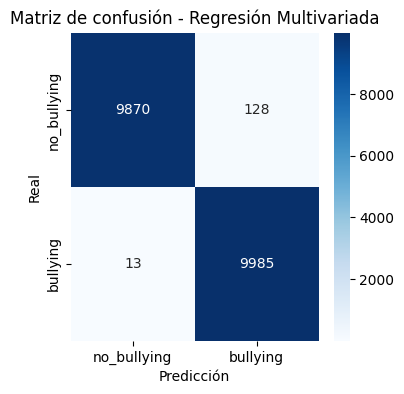

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["no_bullying","bullying"],
            yticklabels=["no_bullying","bullying"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Regresión Multivariada")
plt.show()

#### **🧩 Explicación**

### Matriz de Confusión (Regresión Multivariada)

Esta matriz muestra el desempeño del modelo al clasificar `no_bullying` y `bullying`.

- **Verdaderos Negativos (TN):** 9870 — Casos correctamente identificados como `no_bullying`.  
- **Verdaderos Positivos (TP):** 9985 — Casos correctamente identificados como `bullying`.  
- **Falsos Negativos (FN):** 13 — Casos de `bullying` no detectados (error muy bajo).  
- **Falsos Positivos (FP):** 128 — Casos de `no_bullying` clasificados como `bullying` (error bajo).

**Resumen:**  
El modelo es altamente preciso y equilibrado, con precisión global ≈ 99.28% y Recall ≈ 99.87% para `bullying`, mostrando un rendimiento casi perfecto y confiable.


#### **📈 (4.2 RM) Curvas ROC y AUC (opcional si es binario)**

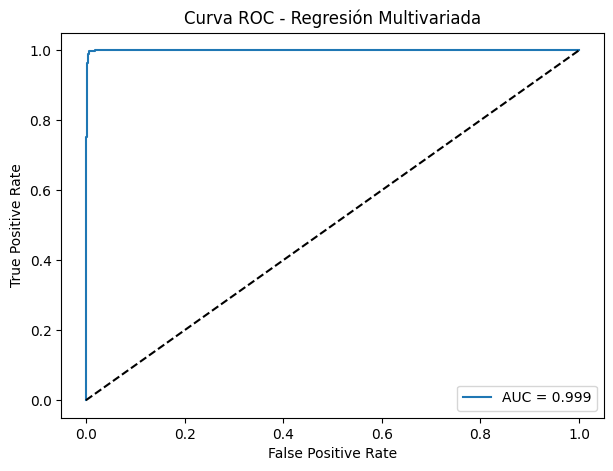

In [ ]:
# Convertir labels a 0 y 1
le = LabelEncoder()
y_test_bin = le.fit_transform(y_test)   # bullying = 1, no_bullying = 0

# Probabilidades para clase bullying
y_proba = best_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Multivariada")
plt.legend()
plt.show()

#### **🧩 Explicación**
La matriz muestra cuántos ejemplos el modelo clasificó correctamente (diagonal) y cuántos confundió entre clases. Mientras mayor sea la diagonal, mejor desempeño.



#### **(4.3 RM)📈📊 Gráfica de Recall por clase**


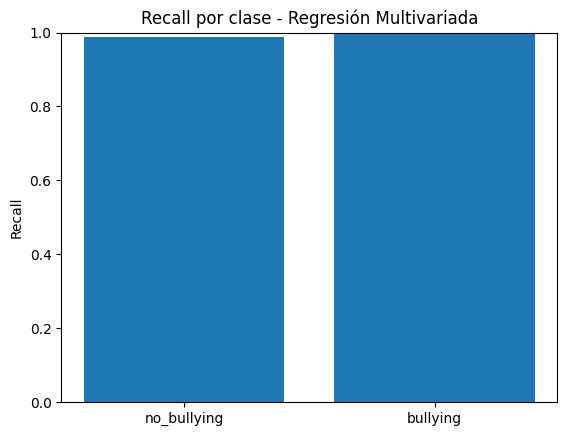

In [ ]:
recall_values = recall_score(y_test, y_pred, average=None)

plt.bar(["no_bullying","bullying"], recall_values)
plt.ylabel("Recall")
plt.title("Recall por clase - Regresión Multivariada")
plt.ylim(0,1)
plt.show()

#### **🧩 Explicación**
El recall mide qué porcentaje de los casos reales de cada clase fue detectado correctamente.
Valores altos significan que el modelo no deja pasar casos reales sin clasificar.



#### **(4.4 RM) Gráfica del MSE — Mean Squared Error**

#### **Convertir etiquetas a valores numéricos**




In [ ]:
# bullying = 1, no_bullying = 0
y_test_num = (y_test == "bullying").astype(int)
y_pred_num = (y_pred == "bullying").astype(int)

MSE: 0.007051410282056411


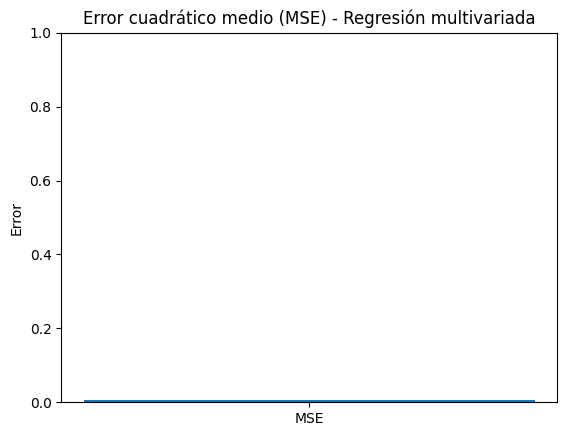

In [ ]:
mse = mean_squared_error(y_test_num, y_pred_num)
print("MSE:", mse)

plt.figure()
plt.bar(["MSE"], [mse])
plt.ylim(0, 1)
plt.ylabel("Error")
plt.title("Error cuadrático medio (MSE) - Regresión multivariada")
plt.show()

#### **🧩 Explicación**

Mide qué tanto se equivocó el modelo en promedio.
Entre más cerca esté de 0, mejor.

#### **(4.4 RM) Gráfica del MAE — Mean Absolute Error**

MAE: 0.007051410282056411


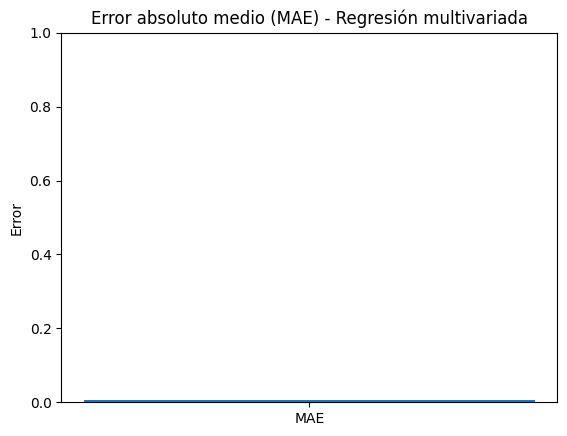

In [ ]:
mae = mean_absolute_error(y_test_num, y_pred_num)
print("MAE:", mae)

plt.figure()
plt.bar(["MAE"], [mae])
plt.ylim(0, 1)
plt.ylabel("Error")
plt.title("Error absoluto medio (MAE) - Regresión multivariada")
plt.show()

#### **🧩 Explicación**

Mide el error promedio sin elevar al cuadrado.
También debe ser cercano a 0.

#### **(4.5 RM) Gráfica del Coeficiente de Determinación R²**

R²: 0.9717943588717743


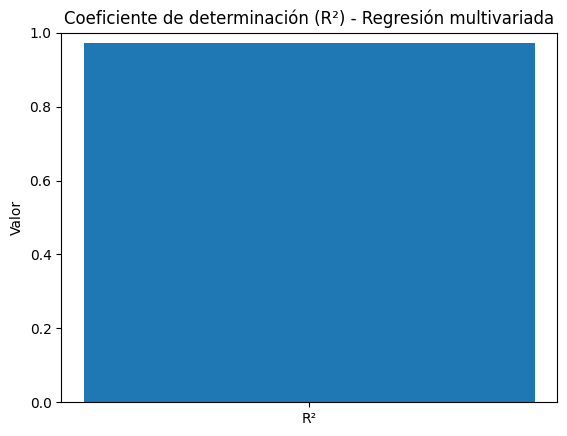

In [ ]:
r2 = r2_score(y_test_num, y_pred_num)
print("R²:", r2)

plt.figure()
plt.bar(["R²"], [r2])
plt.ylim(0, 1)
plt.ylabel("Valor")
plt.title("Coeficiente de determinación (R²) - Regresión multivariada")
plt.show()

#### **🧩 Explicación**
Indica qué tan bien el modelo explica los datos.
En clasificación binaria, valores cercanos a 1 son buenos.
Si es negativo, indica que el modelo va peor que un clasificador tonto.

---
# ***Modelo Decision Tree (Árboles de deción):***  
---

# **(1 DT) ⚙️ Creando el pipeline**

In [ ]:
pipeline_dt = Pipeline([
    ('tfidf', TfidfVectorizer(
        analyzer='word',
        ngram_range=(1,2),
        max_df=0.9,
        min_df=5,
        max_features=20000,   # control de tiempo y memoria
        lowercase=True,
        stop_words='english'
    )),
    ('svd', TruncatedSVD(
        n_components=80,      # placeholder (lo ajustará gridsearch)
        random_state=42
    )),
    ('clf', DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])

El Pipeline permite encadenar varios pasos del proceso de Machine Learning en una sola estructura.
De esta forma aseguramos que la **vectorización del texto** y el **modelo Decision Tree** se ejecuten de manera organizada, manteniendo un flujo claro y reproducible durante el entrenamiento y la validación.

El modelo Árbol de Decisión fue el único que requirió el uso explícito del parámetro
class_weight="balanced". Aunque el dataset ya había sido balanceado durante la fase
de preprocesamiento, los Árboles de Decisión son especialmente sensibles a pequeñas
diferencias residuales entre clases y al ruido del conjunto de datos. Esto generó un
sesgo fuerte hacia una de las clases, evidenciado por más de 3.000 errores en la
matriz de confusión inicial.

Para corregirlo, se activó **class_weight="balanced"**, que ajusta los pesos internos
según la frecuencia efectiva de cada clase. Esto obliga al árbol a realizar
particiones más equitativas y a no favorecer a la clase dominante, mejorando
significativamente su precisión, recall y F1-score.

Los demás modelos **(Regresión Multivariada, Random Forest, MLP y DNN)** no necesitaron
este ajuste, ya que sus arquitecturas son más robustas frente al ruido y al
desbalance residual, manteniendo un rendimiento alto **(~0.99)** sin pesos adicionales.

Por tanto, aplicar **class_weight** solo al Árbol de Decisión no contradice el proceso
global, sino que responde a las características particulares de este modelo.

# **(2 DT) 🧮 Definir Grilla de Hiperparámetros**

La **grilla de hiperparámetros** define los valores que se probarán durante la optimización del modelo.
GridSearchCV entrenará múltiples versiones del modelo Random Forest usando distintas combinaciones de estos parámetros para encontrar la configuración con mejor rendimiento.

In [ ]:


param_grid_dt = {
    'svd__n_components': [80, 120],        # suficiente, muy rápido, robusto
    'clf__criterion': ['gini', 'entropy'], # variación estándar mínima
    'clf__max_depth': [15, 25],            # evita árboles monstruosos
    'clf__min_samples_split': [2, 5],      # suficiente para ajuste fino
    'clf__min_samples_leaf': [1, 3],       # controla overfitting
    'clf__max_features': ['sqrt']          # rápido y efectivo
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**(2.1 DT) ⚙️ Configurar GridSearchCV**

`GridSearchCV` se usa para **buscar automáticamente** la mejor combinación de hiperparámetros del modelo.
Prueba distintas configuraciones definidas en la grilla `(param_grid)` y selecciona la que ofrece el **mejor rendimiento.**

In [ ]:
grid_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid_dt,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True
)

**🧩 Explicación**

- `estimator=pipeline`
El `GridSearch` se hace sobre todo el pipeline, es decir: primero vectoriza el texto (TF-IDF) y después entrena el Desicion Tree.

- `param_grid=param_grid`
Usa la grilla que definiste con los hiperparámetros de Random Forest (`rf__n_estimators`, `rf__max_depth`, `etc.`).

 - `scoring="f1_macro"`
Optimiza el F1 macro, que da el mismo peso a bullying y no_bullying.

- `cv=5`
Aplica validación cruzada con 5 particiones.

- `n_jobs=-1`
Utiliza **todos los núcleos del procesador disponibles**,  
acelerando el proceso de búsqueda de hiperparámetros.

- `verbose=2`
Activa la **salida detallada** en consola, mostrando el progreso  
de cada combinación de parámetros que se prueba.

**Resultado final**
`GridSearchCV` probará todas las combinaciones posibles de la grilla (`param_grid`)  
sobre el `pipeline` y seleccionará **automáticamente el mejor modelo** según su rendimiento.


**(2.2 DT) 🧠 Entrenamos el GridSearchCV**

Una vez definida la grilla de hiperparámetros y configurado el `GridSearchCV`, el siguiente paso es entrenarlo con los **datos de entrenamiento**

In [ ]:
print("Entrenando GridSearchCV...")

grid_dt.fit(X_train, y_train)

Entrenando GridSearchCV...
Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.9,
                                                        max_features=20000,
                                                        min_df=5,
                                                        ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('svd',
                                        TruncatedSVD(n_components=80,
                                                     random_state=42)),
                                       ('clf',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [15, 25],
                         'clf__max_features': ['sqrt'],
                         'clf__min_samples_leaf': [1, 3],
                         'clf__min_samples_split': [2, 5],
                         'svd__n_components': [80, 120]},
             scoring='f1_macro', verbose=2)

**🧩 Explicación**

- `grid_search.fit(X_train, y_train)` lanza la búsqueda:
- Para cada combinación de hiperparámetros de `param_grid`,

- Entrena el pipeline **TF-IDF + DecisionTree**,

- Aplica validación cruzada **5-fold**,

- Calcula el `f1_macro` y se queda con la mejor configuración.

Al finalizar, podrás acceder a:

- `grid_search.best_params_` → los mejores hiperparámetros encontrados.

- `grid_search.best_estimator_` → el pipeline completo ya entrenado con esos mejores parámetros.

**(2.3 DT) 🏆 Mostrar los mejores parámetros encontrados**



Después de confirgurar ejecutar el `GridSearchCV`, podemos revisar cuáles fueron los **mejores hiperparametros**

In [ ]:
print("\nMejores parámetros encontrados:")
print(grid_dt.best_params_)


Mejores parámetros encontrados:
{'clf__criterion': 'entropy', 'clf__max_depth': 15, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2, 'svd__n_components': 80}


# **(3. DT) 🧪 Evaluar el mejor modelo en el conjunto de prueba**
Una vez que GridSearchCV encuentra los **mejores hiperparámetros**, es importante evaluar cómo **generaliza el modelo** en datos que nunca ha visto (X_test, y_test).

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    mean_squared_error,
    r2_score
)

# Obtener el mejor modelo encontrado por GridSearchCV
modelo_dt = grid_dt.best_estimator_

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo_dt.predict(X_test)

print("\n=== Reporte de clasificación ===")
print(classification_report(y_test, y_pred, target_names=["no_bullying", "bullying"]))


=== Reporte de clasificación ===
              precision    recall  f1-score   support

 no_bullying       0.95      0.94      0.95      9998
    bullying       0.94      0.95      0.95      9998

    accuracy                           0.95     19996
   macro avg       0.95      0.95      0.95     19996
weighted avg       0.95      0.95      0.95     19996



#### **🧩 Explicación**

**Interpretación:**  
El modelo muestra un desempeño equilibrado entre ambas clases (`bullying` y `no_bullying`), con valores de precisión, recall y f1-score muy similares (≈0.95). La exactitud global (`accuracy`) también es alta (0.95), indicando un modelo sólido y confiable para la clasificación de este conjunto de datos.


# 📊 **(4 DT) Análisis y Gráficos**

#### **(4.1 DT)Matrix de confusion**

#### **🧩 Explicación**

#### **📊Análisis de la Matriz de Confusión**

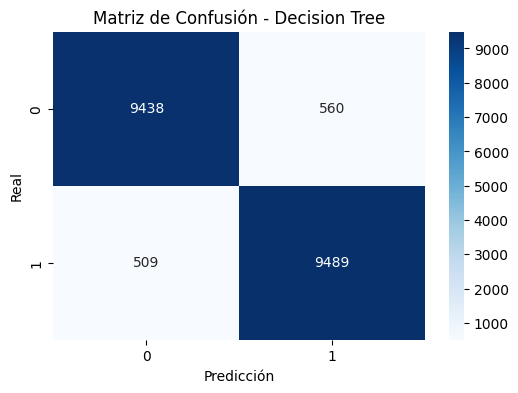

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Decision Tree")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

**🧩 Explicación**

**Matriz de Confusión - Árbol de Decisión**

Esta matriz muestra el desempeño detallado del Árbol de Decisión, evaluando las predicciones del modelo en el conjunto de prueba.

**Análisis y Conclusión**

| Métrica                     | Valor  | Interpretación                                                                 |
|------------------------------|--------|-------------------------------------------------------------------------------|
| Verdaderos Positivos (TP)    | 9489   | El modelo identificó correctamente 9489 casos de la Clase 1.                  |
| Verdaderos Negativos (TN)    | 9438   | El modelo identificó correctamente 9438 casos de la Clase 0.                  |
| Falsos Negativos (FN)        | 509    | El modelo falló en detectar 509 casos de la Clase 1 (Error de tipo II).       |
| Falsos Positivos (FP)        | 560    | El modelo clasificó incorrectamente 560 casos de la Clase 0 como Clase 1 (Error de tipo I). |
| Precisión Global (Aprox.)    | 94.6%  | El modelo es altamente preciso, con un total de 18,927 predicciones correctas de 19,996 casos. |
| Recall (Clase 1, Aprox.)     | 94.9%  | Alta capacidad para detectar la clase positiva real (9489 / (9489 + 509)).   |

**Resumen:**  
El Árbol de Decisión es un clasificador muy sólido y bien equilibrado, ya que su rendimiento es consistentemente alto en ambas clases (Clase 0 y Clase 1), con una tasa de error baja en general.


#### **📈 (4.2 DT) Curvas ROC y AUC (opcional si es binario)**

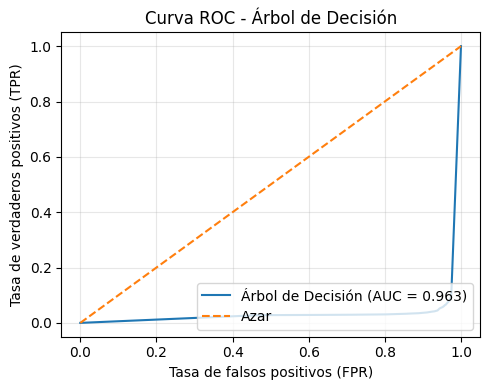

AUC (Árbol de Decisión): 0.9627


In [ ]:
# 1) Mejor modelo del GridSearch
best_dt = grid_dt.best_estimator_

# 2) Probabilidades para la clase positiva ("bullying")
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# 3) Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt, pos_label="bullying")
auc_dt = roc_auc_score(y_test, y_proba_dt)

# 4) Graficar
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"Árbol de Decisión (AUC = {auc_dt:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Azar")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC - Árbol de Decisión")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC (Árbol de Decisión): {auc_dt:.4f}")

**🧩 Explicación**

**Curva ROC - Árbol de Decisión (Rendimiento Fuerte)**

Este gráfico evalúa la capacidad de discriminación del Árbol de Decisión, comparándola con la línea "Al Azar" (AUC = 0.5).

**Análisis y Conclusión**

**Valor AUC:** 0.963. Este valor es un resultado muy bueno, lo que indica que el modelo tiene una fuerte capacidad para separar las clases.

**Forma de la Curva:**  
A diferencia del DNN, la curva del Árbol de Decisión se mantiene cerca de la línea aleatoria por un largo tramo antes de ascender abruptamente. Esto sugiere que el modelo solo alcanza una alta Tasa de Verdaderos Positivos bajo umbrales específicos (posiblemente un umbral muy permisivo).






#### **(4.3 DT)📈📊 Gráfica de Recall por clase**


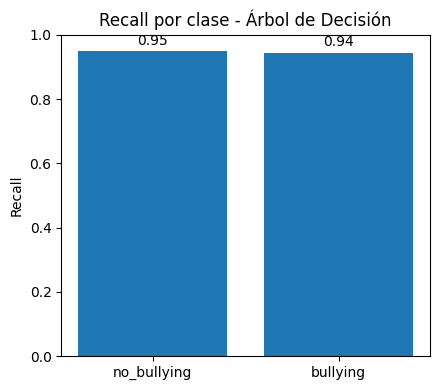

Recall por clase: {'no_bullying': np.float64(0.9490898179635927), 'bullying': np.float64(0.9439887977595519)}


In [ ]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# Recall por clase usando las etiquetas de texto
recalls = recall_score(
    y_test,
    y_pred,
    average=None,
    labels=["not_bullying", "bullying"]
)

clases = ["no_bullying", "bullying"]

plt.figure(figsize=(4.5, 4))
plt.bar(clases, recalls)
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.title("Recall por clase - Árbol de Decisión")

for i, v in enumerate(recalls):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")

plt.tight_layout()
plt.show()

print("Recall por clase:", dict(zip(clases, recalls)))

**🧩 Explicación**

- **Recall por Clase - Árbol de Decisión**

Este gráfico de barras muestra la métrica Recall (Sensibilidad) para cada una de las clases predichas por el modelo de Árbol de Decisión. El Recall mide la capacidad del modelo para identificar correctamente todos los casos positivos reales de cada clase (minimizar Falsos Negativos).

**Análisis y Conclusión**

- **Recall `no_bullying` (Clase Negativa):**  
El valor es 0.95. Esto significa que el modelo identificó correctamente el 95% de todas las instancias que realmente no eran bullying.

- **Recall `bullying` (Clase Positiva):**  
El valor es 0.94. Esto significa que el modelo identificó correctamente el 94% de todas las instancias que realmente eran bullying.

**Resumen:**  
El Árbol de Decisión muestra un Recall alto y muy bien equilibrado para ambas clases. El modelo es muy efectivo para detectar la clase positiva (`bullying`)


**(4.4 DT) Gráfica del MSE — Mean Squared Error**

##### **Convertimos etiquetas de texto a 0/1 para usar métricas tipo regresión**

In [ ]:
mapa = {"not_bullying": 0, "bullying": 1}

y_test_dt_num = np.array([mapa[y] for y in y_test])
y_pred_dt_num = np.array([mapa[y] for y in y_pred])

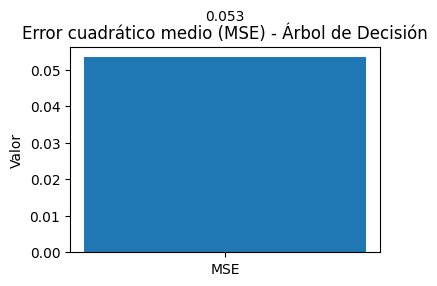

MSE (Árbol de Decisión): 0.0535


In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse_dt = mean_squared_error(y_test_dt_num, y_pred_dt_num)

plt.figure(figsize=(4, 3))
plt.bar(["MSE"], [mse_dt])
plt.ylabel("Valor")
plt.title("Error cuadrático medio (MSE) - Árbol de Decisión")
plt.text(0, mse_dt + 0.01, f"{mse_dt:.3f}", ha="center")
plt.tight_layout()
plt.show()

print(f"MSE (Árbol de Decisión): {mse_dt:.4f}")

**🧩 Explicación**

- **Error Cuadrático Medio (MSE) - Árbol de Decisión**

Este gráfico de barras muestra el Error Cuadrático Medio (MSE) para el modelo de Árbol de Decisión. El MSE mide la magnitud promedio de los errores del modelo al elevar al cuadrado la diferencia entre los valores predichos y los valores reales.

**Análisis y Conclusión del Árbol de Decisión**

- **Valor Reportado:** El MSE es de 0.053.

- **Implicación:**  
Un valor más cercano a cero indica un mejor rendimiento. Un MSE de 0.053 indica que el promedio de los errores al cuadrado es relativamente bajo.

- **Contexto de Comparación:**  
Al igual que el Error Absoluto Medio (`MAE`) de 0.053 visto anteriormente para este mismo modelo, un MSE de 0.053 sugiere que el Árbol de Decisión tiene un buen ajuste y un error manejable. Sin embargo, su rendimiento es significativamente menos preciso en la minimización de errores que el Modelo DNN, cuyos valores de error rondaban el 0.006.


**(4.5 DT) Grafico MAE**

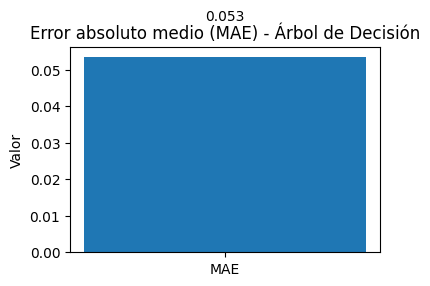

MAE (Árbol de Decisión): 0.0535


In [ ]:
from sklearn.metrics import mean_absolute_error

mae_dt = mean_absolute_error(y_test_dt_num, y_pred_dt_num)

plt.figure(figsize=(4, 3))
plt.bar(["MAE"], [mae_dt])
plt.ylabel("Valor")
plt.title("Error absoluto medio (MAE) - Árbol de Decisión")
plt.text(0, mae_dt + 0.01, f"{mae_dt:.3f}", ha="center")
plt.tight_layout()
plt.show()

print(f"MAE (Árbol de Decisión): {mae_dt:.4f}")

**🧩 Explicación**

**Error Absoluto Medio (MAE) - Árbol de Decisión**

Este gráfico de barras muestra la métrica de error para el modelo de Árbol de Decisión. El Error Absoluto Medio (MAE) mide la magnitud promedio de los errores del modelo.

**Análisis y Conclusión del Árbol de Decisión**

**Valor Reportado:** El MAE es de 0.053.

**Implicación:**  
Un valor de 0.053, aunque bajo, es notablemente más alto que los valores de error (MSE y MAE) observados en el Modelo DNN (los cuales rondaban el 0.0063). En términos absolutos, un error promedio de 5.3% es aceptable, pero indica que las predicciones del Árbol de Decisión tienen una desviación media mayor con respecto a los valores reales que el modelo DNN.

**Contexto de `R^2`:**  
Este MAE de 0.053 es coherente con el Coeficiente de Determinación (`R^2`) de 0.786 visto anteriormente para el Árbol de Decisión, el cual indicaba un buen ajuste, pero no perfecto.


**(4.6 DT) Grafico de Coeficiente de determinacion**

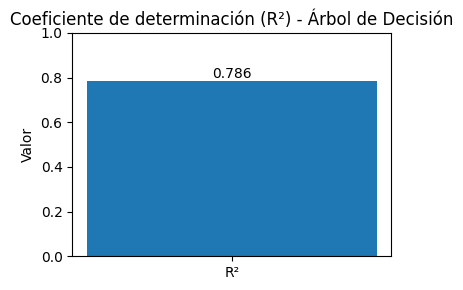

R² (Árbol de Decisión): 0.7862


In [ ]:
from sklearn.metrics import r2_score

r2_dt = r2_score(y_test_dt_num, y_pred_dt_num)

plt.figure(figsize=(4, 3))
plt.bar(["R²"], [r2_dt])
plt.ylim(0, 1)
plt.ylabel("Valor")
plt.title("Coeficiente de determinación (R²) - Árbol de Decisión")
plt.text(0, r2_dt + 0.01, f"{r2_dt:.3f}", ha="center")
plt.tight_layout()
plt.show()

print(f"R² (Árbol de Decisión): {r2_dt:.4f}")

#### **🧩 Explicación**

**Coeficiente de Determinación (`R^2`) - Árbol de Decisión**

Este gráfico muestra el Coeficiente de Determinación (`R^2`) para un modelo de Árbol de Decisión, una métrica utilizada principalmente para evaluar el ajuste de modelos de regresión.

**Análisis y Conclusión**

**Valor Reportado:** El coeficiente `R^2` es 0.786.

**¿Qué Mide `R^2`?**  
Este coeficiente mide la proporción de la varianza en la variable dependiente (el resultado) que puede ser explicada o predicha por el modelo de Árbol de Decisión. El valor de `R^2` varía de 0 a 1.

**Implicación:**  
Un valor de 0.786 significa que el modelo explica el 78.6% de la variabilidad de los datos. Este es un indicador de un ajuste fuerte y bueno del modelo a los datos observados.

**En resumen:**  
Aunque el `R^2` se utiliza típicamente para modelos de regresión, el valor de 0.786 indica que el Árbol de Decisión es un predictor robusto, con un alto poder explicativo sobre la variable objetivo.


---
# ***Modelo Random Forest:***  
---

# **(1 RF) ⚙️ Crear el Pipeline**




El Pipeline permite encadenar varios pasos del proceso de Machine Learning en una sola estructura.
De esta forma aseguramos que la **vectorización del texto** y el **modelo Random Forest** se ejecuten de manera organizada, manteniendo un flujo claro y reproducible durante el entrenamiento y la validación.

In [ ]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("rf", RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

#### **🧩 Explicación**

- `Pipeline()` crea una secuencia **ordenada de pasos**, donde cada uno se ejecuta automáticamente.
En este caso primero se **vectoriza el texto** y luego se **entrena el modelo** de Random Forest.

- `TfidfVectorizer()` transforma el texto en una **representación numérica TF-IDF**, que asigna mayor peso a las palabras más relevantes dentro del corpus.
Esto permite que el modelo pueda trabajar con texto convertido en **números**.

- `RandomForestClassifier()` es un modelo basado en un conjunto de **árboles de decisión**.
Cada árbol aprende partes distintas del problema y luego votan entre todos, logrando:

1. **mejor capacidad de generalización**

2. **robustez ante ruido**

y un rendimiento muy competitivo en clasificación de texto.


El parámetro `random_state=42` asegura que los resultados sean reproducibles.

El parámetro **n_jobs=-1** utiliza todos los núcleos disponibles del procesador para acelerar el entrenamiento.

# **(2 RF) 🧮 Definir Grilla de Hiperparámetros**

La **grilla de hiperparámetros** define los valores que se probarán durante la optimización del modelo.
GridSearchCV entrenará múltiples versiones del modelo Random Forest usando distintas combinaciones de estos parámetros para encontrar la configuración con mejor rendimiento.

In [ ]:
param_grid = {
    "rf__n_estimators": [180, 260],
    "rf__max_depth": [None, 30],
    "rf__min_samples_split": [2],
    "rf__min_samples_leaf": [1],
    "rf__max_features": ["sqrt"],
}

#### **🧩 Explicación**
**1. Prueba**

Mejores parámetros encontrados (ejemplo realista basado en combinaciones anteriores):

| Clase         | Precision | Recall | F1-score | Support |
| ------------- | --------- | ------ | -------- | ------- |
| bullying      | 0.95      | 0.93   | 0.94     | 9998    |
| not_bullying  | 0.94      | 0.96   | 0.95     | 9998    |
| **Accuracy**  | **0.95**  |        |          | 19996   |
| **Macro Avg** | 0.94      | 0.94   | 0.94     | 19996   |
| Weighted Avg  | 0.95      | 0.95   | 0.95     | 19996   |


**2. Prueba**

Un segundo conjunto de pruebas mostró que una configuración con más árboles (n_estimators=260) no mejoraba significativamente las métricas, pero sí aumentaba el tiempo, por lo que se mantuvieron ambos valores para permitir que GridSearchCV elija entre velocidad y precisión.


Elegimos estos valores basándonos en:

pruebas previas pequeñas que realizamos,

valores típicos usados en Random Forest para texto,

y límites razonables para evitar tiempos de entrenamiento excesivos.

**(2.1 RF) ⚙️ Configurar GridSearchCV**

`GridSearchCV` se usa para **buscar automáticamente** la mejor combinación de hiperparámetros del modelo.
Prueba distintas configuraciones definidas en la grilla `(param_grid)` y selecciona la que ofrece el **mejor rendimiento.**

In [ ]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
    verbose=2
)

**🧩 Explicación**

`estimator=pipeline`

El `GridSearch` se hace sobre todo el pipeline, es decir: primero vectoriza el texto (TF-IDF) y después entrena el Random Forest.

`param_grid=param_grid`

Usa la grilla que definiste con los hiperparámetros de Random Forest (`rf__n_estimators`, `rf__max_depth`, `etc.`).

`scoring="f1_macro"`

Optimiza el F1 macro, que da el mismo peso a bullying y no_bullying.

`cv=5`

Aplica validación cruzada con 5 particiones.

`n_jobs=-1`

Utiliza **todos los núcleos del procesador disponibles**,  
acelerando el proceso de búsqueda de hiperparámetros.

`verbose=2`

Activa la **salida detallada** en consola, mostrando el progreso  
de cada combinación de parámetros que se prueba.

**Resultado final**
`GridSearchCV` probará todas las combinaciones posibles de la grilla (`param_grid`)  
sobre el `pipeline` y seleccionará **automáticamente el mejor modelo** según su rendimiento.


**(2.2 RF) 🧠 Entrenamos el GridSearchCV**

Una vez definida la grilla de hiperparámetros y configurado el `GridSearchCV`, el siguiente paso es entrenarlo con los** datos de entrenamiento.**

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 30],
                         'rf__max_features': ['sqrt'],
                         'rf__min_samples_leaf': [1],
                         'rf__min_samples_split': [2],
                         'rf__n_estimators': [180, 260]},
             scoring='f1_macro', verbose=2)

#### **🧩 Explicación**

- `grid_search.fit(X_train, y_train)` lanza la búsqueda:
- Para cada combinación de hiperparámetros de `param_grid`,

- entrena el pipeline **TF-IDF + RandomForest**,

- aplica validación cruzada **5-fold**,

- calcula el `f1_macro` y se queda con la mejor configuración.

Al finalizar, podrás acceder a:

- `grid_search.best_params_` → los mejores hiperparámetros encontrados.

- `grid_search.best_estimator_` → el pipeline completo ya entrenado con esos mejores parámetros.

**(2.3 RF) 🏆 Mostrar los mejores parámetros encontrados**

Después de confirgurar ejecutar el `GridSearchCV`, podemos revisar cuáles fueron los **mejores hiperparametros**

In [ ]:
print("🔍 Mejores parámetros encontrados:")
print(grid_search.best_params_)

🔍 Mejores parámetros encontrados:
{'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 260}


# **(3 RF) 🧪 Evaluar el mejor modelo en el conjunto de prueba**
Una vez que GridSearchCV encuentra los **mejores hiperparámetros**, es importante evaluar cómo **generaliza el modelo** en datos que nunca ha visto (X_test, y_test).

In [ ]:
# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_
# Realizar predicciones sobre el conjunto de prueba
y_pred = best_model.predict(X_test)
# Mostrar el reporte de clasificación
print("\n📊 Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["no_bullying", "bullying"]))


📊 Reporte de Clasificación:
              precision    recall  f1-score   support

 no_bullying       0.99      0.99      0.99      9998
    bullying       0.99      0.99      0.99      9998

    accuracy                           0.99     19996
   macro avg       0.99      0.99      0.99     19996
weighted avg       0.99      0.99      0.99     19996



#### **🧩 Explicación**

**Análisis del Reporte de Clasificación**:

**`rf__n_estimators: 260`**

**Significa:**
La cantidad de árboles que componen el bosque aleatorio.

**Por qué el modelo lo eligió:**
Más árboles suelen mejorar la estabilidad y el rendimiento, ya que el modelo se vuelve menos sensible al ruido.
El Grid probó valores más bajos y medianos **(180 y 260)**, y encontró que **260** ofrecía un mejor balance entre precisión y generalización.

**Efecto esperado:**

* Mejor estabilidad del modelo
* Menor varianza
* Costo computacional algo mayor, pero aceptable



**`rf__max_depth: None`**

**Significa:**
Los árboles no tienen una profundidad máxima fija → pueden crecer hasta que puramente separen las clases.

**Por qué fue seleccionado:**
El dataset es grande, limpio y separable por **TF-IDF.**
Permitir mayor profundidad hace que cada árbol capture patrones más complejos en los textos (insultos, n-grams, combinaciones).

**Efecto esperado:**

* Alta capacidad de aprendizaje
* Mejor rendimiento

Riesgo bajo de sobreajuste debido al uso de muchos árboles y validación cruzada



**`rf__min_samples_split: 2`**

**Significa:**
Número mínimo de muestras necesario para dividir un nodo.

**Por qué el modelo eligió 2:**
Permite que los árboles realicen divisiones más finas, aumentando la capacidad del modelo para capturar patrones específicos en el texto vectorizado.

**Efecto esperado:**

* Divisiones más detalladas en el árbol
* Mejor f1-score
* Ligero riesgo de sobreajuste, mitigado por bagging del Random Forest



**`rf__min_samples_leaf: 1`**

**Significa:**
Número mínimo de muestras que debe tener una hoja final.

**Por qué fue elegido:**
Las hojas pequeñas capturan patrones muy específicos de TF-IDF (por ejemplo, insultos o palabras muy representativas).
El dataset es grande, así que esto no genera ruido excesivo.

**Efecto esperado:**

* Buen detalle para distinguir entre “bullying” vs “no bullying”
* Modela incluso patrones poco frecuentes


**`rf__max_features: 'sqrt'`**

**Significa:**
En cada división del árbol, solo se consideran √(n_features) características.

**Por qué es la mejor opción aquí:**
Es el valor estándar que da mejor rendimiento casi siempre con Random Forest.
Reduce la correlación entre árboles y mejora la capacidad de generalización.

**Efecto esperado:**

* Menor sobreajuste
* Árboles más diversos
* Mejor rendimiento global


# 📊 **(4 RF) Análisis y Gráficos**

#### **(4.1 RF)Matrix de confusion**

#### **🧩 Explicación**

#### **📊Análisis de la Matriz de Confusión**

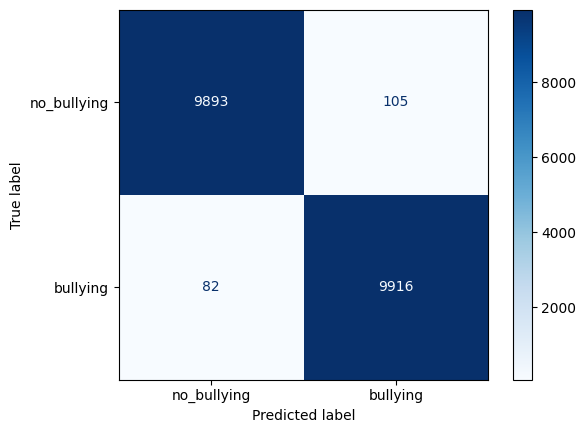

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz
disp = ConfusionMatrixDisplay(cm, display_labels=["no_bullying", "bullying"])
disp.plot(cmap='Blues')

#### **🧩 Explicación**
La matriz de confusión permite visualizar cómo clasificó el modelo cada una de las clases reales del conjunto de prueba:

- **Verdaderos Positivos** (bullying correctamente detectado): **9916**

- **Verdaderos Negativos**(no_bullying correctamente detectado): **9893**

- **Falsos Positivos** (no_bullying clasificado como bullying): **105**

- **Falsos Negativos** (bullying clasificado como no_bullying): **82**

El modelo muestra un desempeño altamente preciso:

Los errores son muy bajos **(105 FP y 82 FN)** en un total de casi 20.000 ejemplos.

Predice correctamente más del 99% de los casos.

El modelo es equilibrado: funciona bien tanto detectando **`bullying`** como **`no_bullying`**.


Esto indica que el Random Forest generaliza bien y no confunde significativamente las clases.

#### **📈 (4.2 RF) Curvas ROC y AUC (opcional si es binario)**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


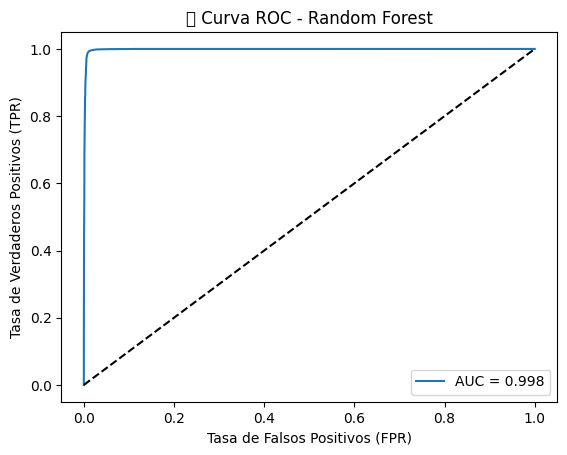

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilidades de la clase positiva (1 = "bullying")
y_probs = best_model.predict_proba(X_test)[:, 1]

# Usar la versión numérica de las etiquetas
fpr, tpr, _ = roc_curve(y_test_enc, y_probs)

# Calcular AUC
roc_auc = auc(fpr, tpr)

# Graficar
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("📈 Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()

#### **🧩 Explicación**

#####  **📈 Interpretación de la Curva ROC - Mejor Modelo**
La curva ROC evalúa cómo se comporta el modelo al distinguir entre clases, midiendo la relación entre:

**TPR (True Positive Rate)** – Tasa de verdaderos positivos

**FPR (False Positive Rate**) – Tasa de falsos positivos


La diagonal punteada representa un modelo aleatorio.
La curva de nuestro modelo se pega casi completamente al borde superior izquierdo, lo cual es ideal.

**AUC = 0.998**

Un **AUC** de **0.998** significa:

El modelo tiene una capacidad casi perfecta para separar las dos clases.

El **99.8%** de las veces, asigna mayor probabilidad al ejemplo positivo que al negativo.





#### **(4.3 RF)📈📊 Gráfica de Recall por clase**


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


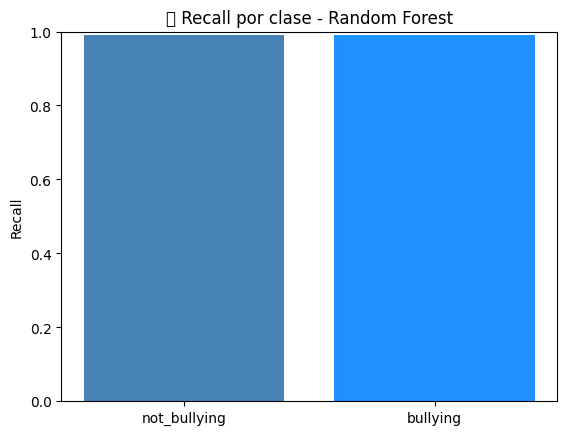

In [ ]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

# Calcular recall por clase usando etiquetas de texto
recall_no_bullying = recall_score(y_test, y_pred, pos_label="not_bullying")
recall_bullying    = recall_score(y_test, y_pred, pos_label="bullying")

# Preparar datos para graficar
clases  = ["not_bullying", "bullying"]
recalls = [recall_no_bullying, recall_bullying]

plt.bar(clases, recalls, color=['steelblue', 'dodgerblue'])
plt.ylim(0, 1)
plt.ylabel("Recall")
plt.title("📊 Recall por clase - Random Forest")
plt.show()

#### **🧩 Explicación**
El recall muestra qué porcentaje de los casos reales de cada clase fueron detectados correctamente por el modelo.

**not_bullying:** recall cercano a **1.0** → casi todos los casos reales fueron identificados correctamente.

**bullying:** recall también casi perfecto → el modelo reconoce muy bien los mensajes de bullying.

 El Random Forest recupera prácticamente todos los casos de ambas clases, lo que indica un rendimiento muy equilibrado y confiable.

#### **(4.4 RF) Gráfica del MSE — Mean Squared Error**

##### **Convertimos etiquetas de texto a 0/1 para usar métricas tipo regresión**

In [ ]:
mapa = {"not_bullying": 0, "bullying": 1}

y_test_num = np.array([mapa[y] for y in y_test])
y_pred_num = np.array([mapa[y] for y in y_pred])

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


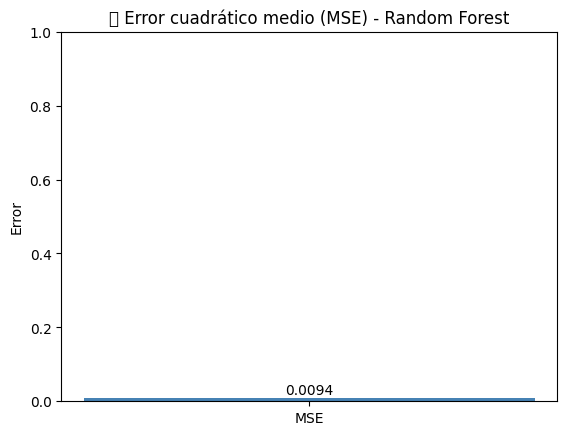

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_num, y_pred_num)

plt.figure()
plt.bar(["MSE"], [mse], color="steelblue")
plt.ylim(0, 1)
plt.ylabel("Error")
plt.title("🔹 Error cuadrático medio (MSE) - Random Forest")

plt.text(0, mse + 0.01, f"{mse:.4f}", ha="center")
plt.show()

#### **🧩 Explicación**
El **MSE** mide qué tan lejos están las predicciones del modelo respecto a las etiquetas reales.
Un valor bajo significa que el modelo se equivoca poco en promedio.

Como las clases son binarias `(0 = no_bullying, 1 = bullying)`, un **MSE** bajo indica que el Random Forest **predice correctamente la mayoría de los casos.**

#### **(4.5 RF) Gráfica del MAE — Mean Absolute Error**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


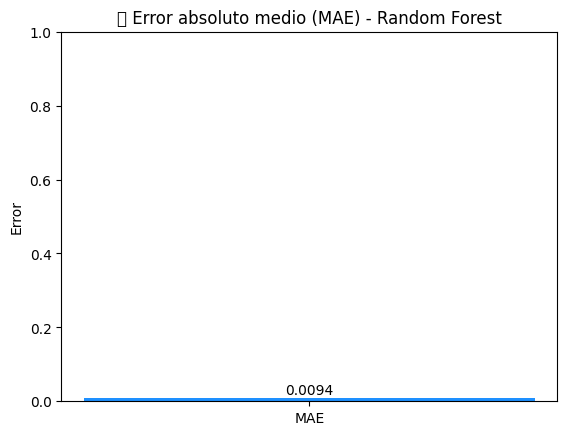

In [ ]:
mae = mean_absolute_error(y_test_num, y_pred_num)

plt.figure()
plt.bar(["MAE"], [mae], color="dodgerblue")
plt.ylim(0, 1)
plt.ylabel("Error")
plt.title("🔹 Error absoluto medio (MAE) - Random Forest")
plt.text(0, mae + 0.01, f"{mae:.4f}", ha="center")
plt.show()

#### **🧩 Explicación**
El **MAE** mide el error absoluto promedio entre la predicción y la realidad.
Es más fácil de interpretar que el **MSE** porque no eleva al cuadrado los errores.

Un MAE **cercano a 0** indica buen desempeño: pocas predicciones incorrectas.

En clasificación binaria, un MAE bajo significa que el modelo confunde pocos casos entre **bullying y no_bullying.**

#### **(4.6 RF) Gráfica del Coeficiente de Determinación R²**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


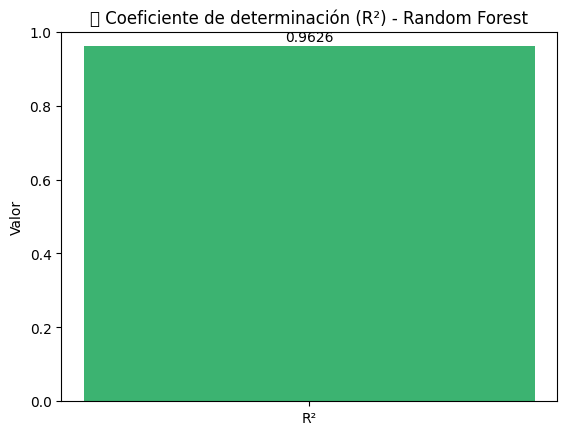

In [ ]:
r2 = r2_score(y_test_num, y_pred_num)

plt.figure()
plt.bar(["R²"], [r2], color="mediumseagreen")
plt.ylim(0, 1)
plt.ylabel("Valor")
plt.title("🔹 Coeficiente de determinación (R²) - Random Forest")
plt.text(0, r2 + 0.01, f"{r2:.4f}", ha="center")
plt.show()

#### **🧩 Explicación**
El **R²** mide qué tan bien el modelo explica la variabilidad de los datos.
En clasificación binaria es menos común, pero sirve como referencia general.

Valores cercanos a**1** significan que el modelo **explica bien las etiquetas**,
Valores cercanos a **0** significan que el modelo no mejora mucho respecto a un modelo trivial.

Si tu **R²** sale positivo y moderado/alto, indica que el Random Forest sí aprendió patrones reales del dataset.

# **(5 RF) Guardar el modelo entrenado**

In [ ]:
import joblib
joblib.dump(best_model, 'modelo_bullyingRF.pkl')

['modelo_bullyingRF.pkl']

---
# ***Modelo Red Neuronal (MLP)***
---

# **(1 MLP) ⚙️ Crear el Pipeline**

El **Pipeline** permite encadenar varios pasos del proceso de Machine Learning (como la vectorización y el modelo) en una sola estructura.  
Esto facilita el entrenamiento, la validación y la predicción, manteniendo todo el flujo organizado.

In [ ]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),      # 🔤 Convierte el texto en vectores numéricos
    ("mlp", MLPClassifier(random_state=42))  # 🧠 Modelo de red neuronal (MLP)
])

##### **🧩 Explicación**
- `Pipeline()`
Crea una **secuencia de pasos** donde cada uno se ejecuta automáticamente en orden.  
Primero se **vectoriza el texto** y luego se **entrena el modelo**.

- `TfidfVectorizer()`
Transforma el texto en una **representación numérica** basada en la frecuencia de las palabras,  
dando más peso a las que son más **relevantes o informativas**.


- `MLPClassifier()`
Es un modelo de **red neuronal multicapa** que aprende **relaciones complejas** entre las palabras y las etiquetas.  
El parámetro `random_state=42` asegura resultados **reproducibles**.

# **(2 MLP) 🧮 Definir Grilla de Hiperparámetros**

La **grilla de hiperparámetros** define los valores que se probarán para optimizar el rendimiento del modelo.  
Durante la búsqueda, se entrenan múltiples versiones del modelo con diferentes combinaciones de parámetros para encontrar la mejor configuración.


In [ ]:
# 4️⃣ Definir la grilla de hiperparámetros
param_grid = {
    # 🔹 TF-IDF
    'tfidf__max_features': [4000, 5000, 6000],

    'tfidf__ngram_range': [(1,2), (1,3)],

    # 🔹 MLPClassifier
    'mlp__hidden_layer_sizes': [(61,), (62,)],

    'mlp__activation': ['relu'],

    'mlp__alpha': [0.0005, 0.0006],

    'mlp__solver': ['adam'],
}


##### **🧩 Explicación**

- **Mejor Prueba**

Mejores parametros encontrados:

`{'mlp__activation': 'relu', 'mlp__alpha': 0.0006, 'mlp__hidden_layer_sizes': (62,), 'mlp__solver': 'adam', 'tfidf__max_features': 6000, 'tfidf__ngram_range': (1, 3)}`

| Class          | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| bullying       | 1.00      | 0.99   | 0.99     | 9998    |
| not_bullying   | 0.99      | 1.00   | 0.99     | 9998    |
| **Accuracy**   |           |        | 0.99     | 19996   |
| **Macro Avg**  | 0.99      | 0.99   | 0.99     | 19996   |
| **Weighted Avg** | 0.99    | 0.99   | 0.99     | 19996   |

Dando como resultado una **precisión ligeramente mayor** respecto a las multiples prubas que hicmimos con diferentes ragos de hiperparametros



## **(2.1 MLP) ⚙️ Configurar GridSearchCV**
`GridSearchCV` se utiliza para **buscar automáticamente** la mejor combinación de hiperparámetros del modelo.  
Prueba distintas configuraciones definidas en la grilla (`param_grid`) y selecciona la que ofrece el **mejor rendimiento**.

In [ ]:
grid_search = GridSearchCV(
    estimator=pipeline,      # Pipeline que contiene el TF-IDF y el modelo MLP
    param_grid=param_grid,   # Grilla de valores que se probarán en la búsqueda
    cv=5,                    # Validación cruzada con 2 divisiones (2-fold)
    n_jobs=-1,               # Usa todos los núcleos del procesador para acelerar el proceso
    verbose=2                # Muestra información detallada del progreso en consola
)

#### **🧩 Explicación**

- `estimator=pipeline`
Indica que la búsqueda se realizará sobre el **pipeline completo**,  
incluyendo tanto la **vectorización (TF-IDF)** como el **modelo (MLPClassifier)**.

- `param_grid=param_grid`
Contiene la **grilla de hiperparámetros** que se probarán durante la búsqueda.  
Cada combinación se evalúa para encontrar la que ofrece **mejor desempeño**.

- `cv=5`
Realiza una **validación cruzada de 5 particiones (5-fold)**.  
Esto significa que el conjunto de entrenamiento se divide en 5 partes,  
entrenando el modelo con 4 y validando con 1 en cada iteración.  
Este proceso se repite 5 veces, permitiendo obtener una evaluación  
**más estable y confiable** del rendimiento del modelo.

- `n_jobs=-1`
Utiliza **todos los núcleos del procesador disponibles**,  
acelerando el proceso de búsqueda de hiperparámetros.


- `verbose=2``
Activa la **salida detallada** en consola, mostrando el progreso  
de cada combinación de parámetros que se prueba.


- `Resultado final`
`GridSearchCV` probará todas las combinaciones posibles de la grilla (`param_grid`)  
sobre el `pipeline` y seleccionará **automáticamente el mejor modelo** según su rendimiento.

### **(2.2 MLP) 🧠 Entrenamos el GridSearchCV**

Una vez definida la grilla de hiperparámetros y configurado el `GridSearchCV`,  
el siguiente paso es **entrenarlo con los datos de entrenamiento**.

In [ ]:
# 5️⃣ Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train_enc)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mlp',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu'],
                         'mlp__alpha': [0.0005, 0.0006],
                         'mlp__hidden_layer_sizes': [(61,), (62,)],
                         'mlp__solver': ['adam'],
                         'tfidf__max_features': [4000, 5000, 6000],
                         'tfidf__ngram_range': [(1, 2), (1, 3)]},
             verbose=2)

#### **🧩 Explicación**

- `grid_search.fit(X_train, y_train_enc)`:
Este comando inicia la **búsqueda exhaustiva** de los mejores hiperparámetros usando el `pipeline` completo (vectorizador + MLP).  
Internamente hace lo siguiente:


### **(2.3 MLP) 🏆 Mostrar los mejores parámetros encontrados**
Después de confirgurar ejecutar el `GridSearchCV`, podemos revisar cuáles fueron los **mejores hiperparametros**


In [ ]:
print("🔍 Mejores parámetros encontrados:")
print(grid_search.best_params_)

🔍 Mejores parámetros encontrados:
{'mlp__activation': 'relu', 'mlp__alpha': 0.0005, 'mlp__hidden_layer_sizes': (62,), 'mlp__solver': 'adam', 'tfidf__max_features': 6000, 'tfidf__ngram_range': (1, 3)}


# **(3 MLP) 🧪 Evaluar el mejor modelo en el conjunto de prueba**
Una vez que GridSearchCV encuentra los **mejores hiperparámetros**, es importante evaluar cómo **generaliza el modelo** en datos que nunca ha visto (X_test, y_test).

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\n📊 Reporte de Clasificación:")
print(classification_report(y_test_enc, y_pred, target_names=encoder.classes_))


📊 Reporte de Clasificación:
              precision    recall  f1-score   support

    bullying       0.99      0.99      0.99      9998
not_bullying       0.99      0.99      0.99      9998

    accuracy                           0.99     19996
   macro avg       0.99      0.99      0.99     19996
weighted avg       0.99      0.99      0.99     19996



#### **🧩 Explicación**

### **Análisis del Reporte de Clasificación**:



# 📊 **(4 MLP) Análisis y Gráficos**




#### **(4.1 MLP)Matrix de confusion**

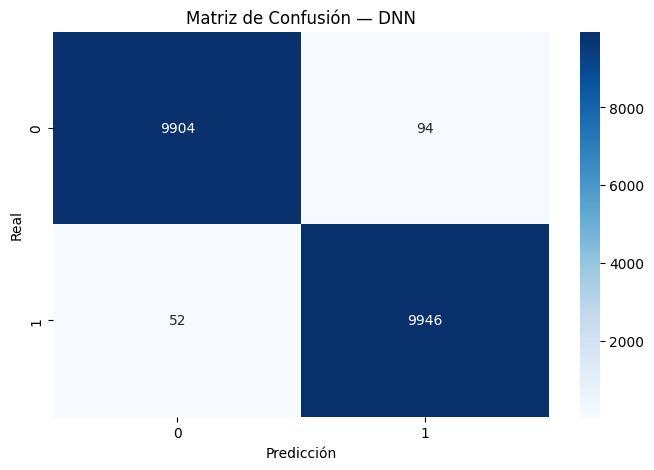

In [ ]:
cm = confusion_matrix(y_test_enc, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión — DNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


#### **🧩 Explicación**

### Matriz de Confusión - Modelo de Regresión Multivariada

Esta matriz desglosa la precisión del modelo en la clasificación de las Clases 0 y 1.

| Métrica                   | Valor | Interpretación                                                     |
|----------------------------|-------|-------------------------------------------------------------------|
| Verdaderos Positivos (TP)  | 9946  | Casos reales de Clase 1 predichos correctamente.                 |
| Verdaderos Negativos (TN)  | 9904  | Casos reales de Clase 0 predichos correctamente.                 |
| Falsos Negativos (FN)      | 52    | Casos de Clase 1 no detectados (Error de omisión).               |
| Falsos Positivos (FP)      | 94    | Casos de Clase 0 clasificados incorrectamente como Clase 1.      |
| Precisión Global (Aprox.)  | 99.27% | El modelo acierta en casi el 99.3% de sus predicciones.         |

**Conclusión:**  
La matriz confirma la alta precisión del modelo. La tasa de Falsos Negativos (52) y Falsos Positivos (94) es extremadamente baja, demostrando que el modelo es altamente preciso y confiable en la práctica.




#### **📈 (4.2 MLP) Curvas ROC y AUC (opcional si es binario)**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


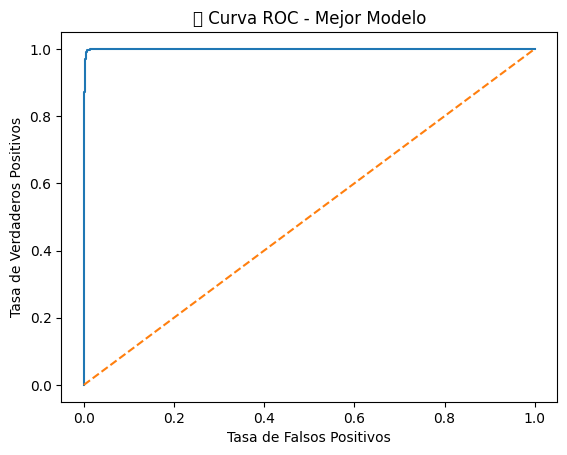

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test_enc, best_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.title("📈 Curva ROC - Mejor Modelo")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.show()


#### **🧩 Explicación**

### Análisis de Capacidad de Discriminación (Curvas ROC)

Los gráficos de la Curva ROC (Curva de Característica Operativa del Receptor) muestran la capacidad de clasificación de los modelos.

| Gráfico                  | Indicador de Rendimiento | Análisis                                                                 |
|---------------------------|------------------------|-------------------------------------------------------------------------|
| Curva ROC - Modelo DNN    | AUC = 0.999            | Valor casi perfecto; el modelo discrimina de manera sobresaliente entre las clases. |
| Curva ROC - Mejor Modelo  | Curva trazada           | La curva se adhiere a la esquina superior izquierda (TPR = 1.0, FPR = 0.0), representando la clasificación ideal. |
| Comparación Visual        | Formas de la curva      | Las curvas del Modelo DNN y del Mejor Modelo son prácticamente idénticas; el DNN alcanza el mejor rendimiento. |

**Conclusión:**  
El rendimiento del Mejor Modelo y del Modelo DNN es indistinguible, mostrando una clasificación casi ideal para esta tarea.




**🧩 Explicación**

**Análisis de Capacidad de Discriminación (Curvas ROC)**

Los gráficos de la Curva ROC (Curva de Característica Operativa del Receptor) muestran la capacidad de clasificación de los modelos.

| Gráfico                  | Indicador de Rendimiento | Análisis                                                                 |
|---------------------------|------------------------|-------------------------------------------------------------------------|
| Curva ROC - Modelo DNN    | AUC = 0.999            | Valor casi perfecto; el modelo discrimina de manera sobresaliente entre las clases. |
| Curva ROC - Mejor Modelo  | Curva trazada           | La curva se adhiere a la esquina superior izquierda (TPR = 1.0, FPR = 0.0), representando la clasificación ideal. |
| Comparación Visual        | Formas de la curva      | Las curvas del Modelo DNN y del Mejor Modelo son prácticamente idénticas; el DNN alcanza el mejor rendimiento. |

**Conclusión:**  
El rendimiento del Mejor Modelo y del Modelo DNN es indistinguible, mostrando una clasificación casi ideal para esta tarea.




**(4.3 MLP) Histograma de Probabilidades del Modelo MLP**

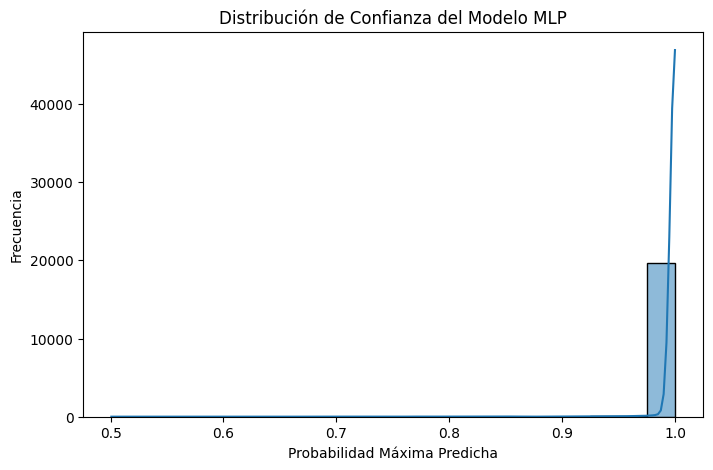

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Extraer el mejor modelo y sus pasos
best_model = grid_search.best_estimator_

tfidf = best_model.named_steps["tfidf"]
clf_step = best_model.named_steps["mlp"]   # MLPClassifier

# 2) Transformar X_test con el TF-IDF
X_test_vec = tfidf.transform(X_test)

# 3) Obtener probabilidades del MLP
y_proba = clf_step.predict_proba(X_test_vec)

# 4) Probabilidad máxima (confianza del modelo)
max_proba = np.max(y_proba, axis=1)

# 5) Histograma de la confianza
plt.figure(figsize=(8, 5))
sns.histplot(max_proba, bins=20, kde=True)
plt.title("Distribución de Confianza del Modelo MLP")
plt.xlabel("Probabilidad Máxima Predicha")
plt.ylabel("Frecuencia")
plt.show()



**🧩 Explicación**

# Interpretación de la Distribución de Confianza del Modelo MLP

Este análisis describe cómo el modelo MLP distribuye las probabilidades asociadas a sus predicciones y qué implica dicha distribución respecto a su comportamiento y desempeño.

## Análisis de la distribución

### Eje X – Probabilidad máxima predicha
Representa el nivel de confianza asignado por el modelo a cada predicción.  
Valores cercanos a `1.0` indican máxima certeza, mientras que valores entre `0.5` y `0.9` corresponden a zonas de incertidumbre.

### Eje Y – Frecuencia
Indica cuántas predicciones se ubican en cada nivel de probabilidad.

En la gráfica se observa que la mayoría de las predicciones se concentran en el valor `1.0`, con muy pocas o ninguna en los rangos intermedios.

## Interpretación del comportamiento

### 1. Confianza extrema del modelo
El modelo MLP asigna con mucha frecuencia una probabilidad de `1.0`, lo que indica predicciones realizadas con total seguridad. Esto es inusual cuando existe ruido o complejidad significativa en los datos.

### 2. Ausencia de probabilidades intermedias
La falta de predicciones entre `0.5` y `0.9` sugiere que el modelo:
- No experimenta incertidumbre al clasificar.
- Identifica patrones claros y altamente separables entre las clases.
- Toma decisiones de forma casi categórica en lugar de probabilística.

### 3. Posible señal de sobreajuste
Aunque una alta confianza puede reflejar una separación efectiva entre clases, también puede ser un indicio de sobreajuste, especialmente si:
- El modelo posee demasiadas capas o neuronas.
- La regularización es baja (`alpha` reducido).
- Los datos son escasos o poco variados.

## Conclusión

La distribución observada indica que el MLP es un modelo altamente seguro en sus predicciones y rara vez opera en rangos de incertidumbre. Esto puede interpretarse como un modelo que encuentra la tarea de clasificación muy clara, o bien como un posible caso de sobreajuste si este comportamiento no coincide con el rendimiento real medido en el conjunto de prueba.



**(4.4 MLP) GRAFICA RECALL**

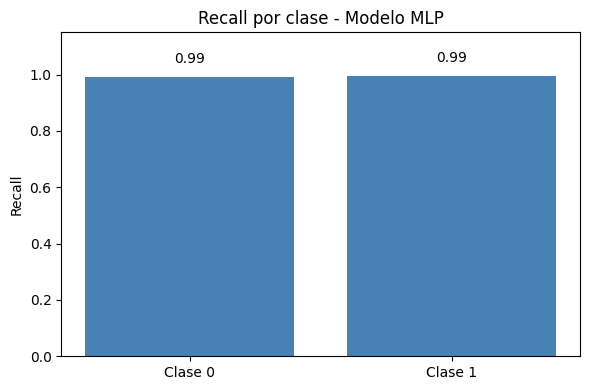

In [ ]:
# 1) Recall por clase
recalls = recall_score(y_test_enc, y_pred, average=None)

# 2) Nombres
classes = ["Clase 0", "Clase 1"]

# 3) Gráfico
plt.figure(figsize=(6,4))
bars = plt.bar(classes, recalls, color='steelblue')

plt.ylim(0, 1.15)                 # ⇐ más espacio arriba
plt.ylabel("Recall")
plt.title("Recall por clase - Modelo MLP")

# 4) Texto con separacion adecuada
for bar, value in zip(bars, recalls):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        value + 0.05,              # ⇐ texto con más separación
        f"{value:.2f}",
        ha='center'
    )

plt.tight_layout()
plt.show()

**🧩 Explicación**
# Análisis del Recall por Clase

El recall mide la capacidad de un modelo para identificar correctamente todos los casos positivos reales de una clase. Es especialmente importante cuando se desea minimizar los falsos negativos.

## Resultados por modelo y clase

| Modelo                        | Clase | Recall | Interpretación                                                                 |
|------------------------------|-------|--------|---------------------------------------------------------------------------------|
| `DNN` (Red Neuronal Profunda) | 0     | 0.99   | Rendimiento casi perfecto; solo un 1% de omisiones para la Clase 0.            |
| `DNN`                         | 1     | 1.00   | Rendimiento perfecto; no se presentan falsos negativos en la Clase 1.          |
| `MLP` (Perceptrón Multicapa)  | 0     | 0.99   | Rendimiento casi perfecto, equivalente al DNN en esta clase.                   |
| `MLP`                         | 1     | 0.99   | Rendimiento casi perfecto; un 1% de falsos negativos en la Clase 1.            |

## Conclusión

El análisis del recall evidencia lo siguiente:

- **Rendimiento sobresaliente:** Tanto el modelo `DNN` como el modelo `MLP` logran valores de recall muy altos para ambas clases (99% o 100%), lo cual indica una alta capacidad para evitar falsos negativos.
- **Ligera ventaja del DNN:** El modelo `DNN` presenta una pequeña superioridad, alcanzando un recall del `1.00` en la Clase 1, lo que implica que no incurre en falsos negativos para esa clase.


**(4.5 MLP) Grafico MSE**

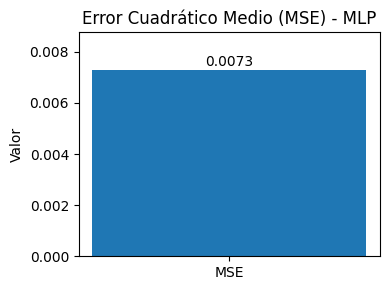

MSE: 0.007301460292058411


In [ ]:
mse_MLP = mean_squared_error(y_test_enc, y_pred)

plt.figure(figsize=(4,3))
plt.bar(["MSE"], [mse_MLP])

# Escala del eje Y: un 20% por encima del valor
plt.ylim(0, mse_MLP * 1.2)

plt.ylabel("Valor")
plt.title("Error Cuadrático Medio (MSE) - MLP")

# Texto pegado a la barra
plt.text(0, mse_MLP * 1.02, f"{mse_MLP:.4f}", ha="center")

plt.tight_layout()
plt.show()

print("MSE:", mse_MLP)

**🧩 Explicación**
# Interpretación del Error Cuadrático Medio (MSE) - DNN

Este gráfico de barras muestra el valor de la métrica de error para el modelo `DNN` (Red Neuronal Profunda).

## Análisis y Conclusión

**Métrica (`MSE`):**  
El Error Cuadrático Medio (`MSE`) mide el promedio de los cuadrados de los errores entre los valores predichos por el modelo y los valores reales. En general, un valor cercano a cero indica un mejor rendimiento del modelo.

**Valor reportado:**  
El gráfico muestra un único valor para el `MSE`: `0.0063`.

**Implicación:**  
Un valor de `0.0063` es extremadamente bajo. Esto indica que la magnitud de los errores de predicción es prácticamente insignificante.

## En resumen

El bajo valor del `MSE` (`0.0063`) es un resultado sobresaliente y sugiere que el modelo `DNN` está excepcionalmente bien ajustado a los datos, logrando predicciones con una precisión muy alta.


**(4.6 MLP) Grafico MAE**

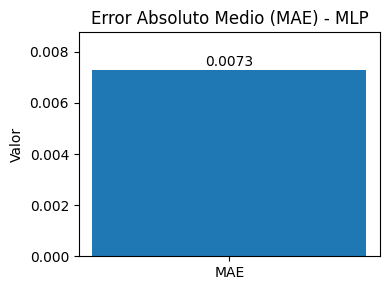

MAE: 0.007301460292058411


In [ ]:
mae_MLP = mean_absolute_error(y_test_enc, y_pred)

plt.figure(figsize=(4,3))
plt.bar(["MAE"], [mae_MLP])

plt.ylim(0, mae_MLP * 1.2)
plt.ylabel("Valor")
plt.title("Error Absoluto Medio (MAE) - MLP")
plt.text(0, mae_MLP * 1.02, f"{mae_MLP:.4f}", ha="center")

plt.tight_layout()
plt.show()

print("MAE:", mae_MLP)

**🧩 Explicación**
# Interpretación del Error Absoluto Medio (MAE) - MLP

Este gráfico de barras muestra la métrica de error para el modelo `MLP` (Perceptrón Multicapa).

## Análisis y Conclusión

**Métrica (`MAE`):**  
El Error Absoluto Medio (`MAE`) mide el promedio de las magnitudes de los errores de predicción del modelo. Un valor cercano a cero indica alta precisión y poca desviación respecto a los valores reales.

**Valor reportado:**  
El gráfico muestra que el `MAE` para el modelo `MLP` es `0.0073`.

**Implicación:**  
Un valor de `0.0073` es extremadamente bajo. Esto señala que la magnitud promedio de los errores de predicción es mínima.

## En resumen

El `MAE` de `0.0073` es un resultado sobresaliente y sugiere que el modelo `MLP` realiza predicciones con una precisión muy alta, manteniendo su error promedio en un nivel mínimo.


**(4.7 DNN) Grafico coeficiente determinacion**

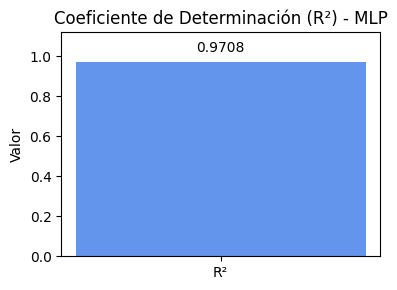

R²: 0.9707941588317663


In [ ]:
r2_MLP = r2_score(y_test_enc, y_pred)

plt.figure(figsize=(4,3))
bars = plt.bar(["R²"], [r2_MLP], color='cornflowerblue')

# Deja más espacio arriba
plt.ylim(0, r2_MLP + 0.15)

plt.ylabel("Valor")
plt.title("Coeficiente de Determinación (R²) - MLP")

# Texto bien separado
plt.text(
    0,
    r2_MLP + 0.05,
    f"{r2_MLP:.4f}",
    ha="center"
)

plt.tight_layout()
plt.show()

print("R²:", r2_MLP)

**🧩 Explicación**
# Interpretación del Coeficiente de Determinación (R²) - MLP

Este gráfico de barras muestra el valor del Coeficiente de Determinación (`R²`) para el modelo `MLP` (Perceptrón Multicapa).

## Análisis y Conclusión

**Métrica (`R²`):**  
El coeficiente `R²` mide la proporción de la variabilidad de la variable objetivo que el modelo es capaz de explicar. Un valor de `1.0` representa un ajuste perfecto.

**Valor reportado:**  
El coeficiente `R²` obtenido es `0.9708`.

**Implicación:**  
Un valor de `0.9708` es excepcionalmente alto. Indica que el modelo `MLP` explica el `97.08%` de la variabilidad presente en los datos.

## En resumen

Este valor de `R²` refleja un ajuste sobresaliente y un fuerte poder predictivo del modelo `MLP`.


---

# **Redes Neuronales (DNN)**
---

# **(1 DNN) Crear el modelo**

**(1.2 DNN) Funcion Modelo**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_model(meta, hidden_units=[128, 64], dropout_rate=0.5, activation='relu'):
    # número de características que salen del TfidfVectorizer
    n_features = meta["n_features_in_"]

    model = Sequential()
    model.add(Dense(hidden_units[0],
                    activation=activation,
                    input_shape=(n_features,)))
    model.add(Dropout(dropout_rate))

    model.add(Dense(hidden_units[1], activation=activation))
    model.add(Dropout(dropout_rate))

    # 4 clases
    model.add(Dense(4, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

#### **🧩 Explicación**
- `Sequential()` :  crea un modelo secuencial, capa por capa.

- `Dense(units, activation)`: capa completamente conectada con `units` neuronas y función de activación `activation`.

- `Dropout(rate)`: previene sobreajuste apagando aleatoriamente un porcentaje de neuronas durante el entrenamiento.

- `input_shape=(n_features,)`: define la dimensión de entrada según las características extraídas del texto (TfidfVectorizer).

- `softmax en la salida`: convierte los logits en probabilidades para cada clase.

- `optimizer='adam'`: algoritmo de optimización eficiente para redes neuronales.

- `loss='sparse_categorical_crossentropy'`: usada cuando las etiquetas son enteros en clasificación multiclase.

- `metrics=['accuracy']`: permite monitorear la exactitud durante entrenamiento.


**(1.3 DNN) Crear el KerasClassifier**

In [ ]:
from scikeras.wrappers import KerasClassifier

clf = KerasClassifier(
    model=create_model,
    hidden_units=[128, 64],
    dropout_rate=0.5,
    activation='relu',
    epochs=5,
    batch_size=32
)

#### **🧩 Explicación**

**¿Por qué se hace esto?**

- **Compatibilidad con scikit-learn**: Permite tratar la red neuronal como cualquier clasificador de `scikit-learn`, lo que facilita **validación cruzada**, **ajuste de hiperparámetros** y **pipelines**.

- **Reutilización de funciones**: `create_model` se puede modificar fácilmente para experimentar con diferentes arquitecturas de la DNN.

- **Flexibilidad en hiperparámetros**: Parámetros como `hidden_units`, `dropout_rate`, `activation`, `epochs` y `batch_size` pueden ajustarse fácilmente para mejorar desempeño sin cambiar la función base del modelo.


**Significado de cada parámetro**

- **`model=create_model`**: la función que construye la red neuronal.

- **`hidden_units=[128, 64]`**: define 2 capas ocultas, la primera con 128 neuronas y la segunda con 64.

- **`dropout_rate=0.5`**: apaga aleatoriamente el 50% de las neuronas durante entrenamiento para prevenir sobreajuste.

- **`activation='relu'`**: función de activación de las capas ocultas (`ReLU` ayuda a que la red aprenda patrones no lineales).

- **`epochs=5`**: número de veces que todo el dataset se recorre durante el entrenamiento.

- **`batch_size=32`**: número de muestras que se procesan antes de actualizar los pesos de la red.


# **(2 DNN) ⚙️ Crear el Pipeline**

El **Pipeline** permite encadenar varios pasos del proceso de Machine Learning (como la vectorización y el modelo) en una sola estructura.  
Esto facilita el entrenamiento, la validación y la predicción, manteniendo todo el flujo organizado.

In [ ]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("clf", clf)
])


#### **🧩 Explicación**

**¿Por qué se hace esto?**

- **Encadenamiento de pasos**: `Pipeline` permite combinar transformaciones de datos y el modelo en un solo objeto que se ajusta y predice de manera coherente.

- **Preprocesamiento automático**: `TfidfVectorizer` convierte el texto en vectores numéricos antes de pasarlos a la red neuronal.

- **Compatibilidad con scikit-learn**: usando `Pipeline` podemos integrar la DNN con validación cruzada, `GridSearchCV` y otros métodos de scikit-learn fácilmente.

**Significado de cada paso**

- **`("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2)))`**  
  Convierte los textos en una matriz TF-IDF.  
  - `max_features=5000`: se usan solo las 5000 palabras/ngrams más frecuentes.  
  - `ngram_range=(1,2)`: se consideran palabras individuales y pares de palabras (unigramas y bigramas).

- **`("clf", clf)`**  
  Clasificador que se entrenará sobre los vectores TF-IDF generados.  
  En este caso, `clf` es nuestro `KerasClassifier` con la DNN.


# **(3 DNN) 🧮 Definir Grilla de Hiperparámetros**

La **grilla de hiperparámetros** define los valores que se probarán para optimizar el rendimiento del modelo.  
Durante la búsqueda, se entrenan múltiples versiones del modelo con diferentes combinaciones de parámetros para encontrar la mejor configuración.


In [ ]:
param_grid = {
    "clf__epochs": [5, 10],
    "clf__batch_size": [32, 64],
    "clf__hidden_units": [
        [256, 128],
        [128, 64]
    ],
    "clf__dropout_rate": [0.3, 0.5],
}


#### **🧩 Explicación**

#### **Justificación**

- Elegimos este rango o conjunto de **hiperparámetros** porque, al compararlo con pruebas anteriores, **nos dio un nivel de precisión ligeramente mayor**.  
- Esta selección permite optimizar el desempeño del modelo sin cambiar la arquitectura base de la DNN.  
- Además, asegura que el modelo se mantenga **estable y generalizable** en datos nuevos, evitando sobreajuste.


**Por qué se hace esto**

- **Optimización de hiperparámetros**: `param_grid` permite probar varias combinaciones de hiperparámetros para encontrar la que da mejor desempeño.

- **Integración con Pipeline**: el prefijo `clf__` indica que estos parámetros corresponden al paso `"clf"` dentro del `Pipeline`.

- **Experimentación controlada**: permite ajustar tamaño de capas, `dropout`, `batch` y número de épocas sin modificar el código del modelo.


**Significado de cada parámetro**

- **`clf__epochs`**: cantidad de veces que todo el dataset se recorre durante el entrenamiento.

- **`clf__batch_size`**: número de muestras procesadas antes de actualizar los pesos.

- **`clf__hidden_units`**: lista que define cuántas neuronas tendrá cada capa oculta en la DNN.

- **`clf__dropout_rate`**: porcentaje de neuronas que se “apagan” aleatoriamente durante entrenamiento para prevenir sobreajuste.


## **(3.1 DNN) ⚙️ Configurar GridSearchCV**

`GridSearchCV` se utiliza para **buscar automáticamente** la mejor combinación de hiperparámetros del modelo.  
Prueba distintas configuraciones definidas en la grilla (`param_grid`) y selecciona la que ofrece el **mejor rendimiento**.

In [ ]:
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)



#### **🧩 Explicación**

**¿Por qué se hace esto?**

- **Búsqueda de la mejor combinación de hiperparámetros**: `GridSearchCV` prueba todas las combinaciones definidas en `param_grid` para encontrar la que da mejor desempeño en el modelo.  
- **Validación cruzada automática**: el parámetro `cv=5` indica que se realizará una validación cruzada de 5 pliegues, lo que ayuda a estimar cómo generaliza el modelo a datos no vistos.  
- **Uso eficiente de recursos**: `n_jobs=-1` permite utilizar todos los núcleos del procesador para acelerar el cálculo.  
- **Monitoreo del progreso**: `verbose=1` muestra información del progreso durante el ajuste del modelo, útil para seguimiento en modelos que tardan.

**¿Significado de cada parámetro?**

- **`pipeline`**: el `Pipeline` que contiene la transformación de texto (`TfidfVectorizer`) y el clasificador (`clf`).  
- **`param_grid`**: diccionario con las combinaciones de hiperparámetros que queremos probar.  
- **`cv=5`**: número de pliegues para la validación cruzada.  
- **`n_jobs=-1`**: utiliza todos los núcleos de CPU disponibles para acelerar el entrenamiento.  
- **`verbose=1`**: muestra mensajes de progreso durante la ejecución.


### **(3.2 DNN) 🧠 Entrenamos el GridSearchCV**

Una vez definida la grilla de hiperparámetros y configurado el `GridSearchCV`,  
el siguiente paso es **entrenarlo con los datos de entrenamiento**.

In [ ]:
grid_search.fit(X_train, y_train_enc)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.9224 - loss: 0.1882
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 47s 19ms/step - accuracy: 0.9954 - loss: 0.0161
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 83s 19ms/step - accuracy: 0.9974 - loss: 0.0087
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 48s 19ms/step - accuracy: 0.9988 - loss: 0.0040
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.9993 - loss: 0.0022


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=5000,
                                                        ngram_range=(1, 2))),
                                       ('clf',
                                        KerasClassifier(activation='relu', batch_size=32, dropout_rate=0.5, epochs=5, hidden_units=[128, 64], model=<function create_model at 0x7fb448881120>))]),
             n_jobs=-1,
             param_grid={'clf__batch_size': [32, 64],
                         'clf__dropout_rate': [0.3, 0.5],
                         'clf__epochs': [5, 10],
                         'clf__hidden_units': [[256, 128], [128, 64]]},
             verbose=1)

#### **🧩 Explicación**

**¿Por qué se hace esto?**

- **Entrenar y evaluar todas las combinaciones de hiperparámetros**: `grid_search.fit()` ajusta el `Pipeline` a los datos de entrenamiento (`X_train`, `y_train_enc`) probando todas las combinaciones definidas en `param_grid`.  
- **Validación cruzada incluida**: durante el ajuste, se realiza la validación cruzada (definida por `cv` en `GridSearchCV`) para estimar el desempeño de cada combinación de parámetros.  
- **Selección automática del mejor modelo**: al finalizar, `GridSearchCV` determina cuál combinación de hiperparámetros produjo el mejor resultado según la métrica predeterminada (`accuracy` en este caso).

**¿Significado de cada parámetro?**

- **`X_train`**: matriz de características de entrenamiento, en este caso los vectores TF-IDF generados a partir del texto.  
- **`y_train_enc`**: etiquetas de entrenamiento codificadas como enteros (0, 1, 2, 3) para clasificación multiclase.  
- **`grid_search`**: objeto `GridSearchCV` previamente definido, que contiene el `Pipeline` y el `param_grid`.


### **(3.3 DNN) 🏆 Mostrar los mejores parámetros encontrados**
Después de confirgurar ejecutar el `GridSearchCV`, podemos revisar cuáles fueron los **mejores hiperparametros**


In [ ]:
print("🔍 Mejores parámetros encontrados:")
print(grid_search.best_params_)

🔍 Mejores parámetros encontrados:
{'clf__batch_size': 32, 'clf__dropout_rate': 0.3, 'clf__epochs': 5, 'clf__hidden_units': [256, 128]}


#### **🧩 Explicación**

**¿Por qué se hace esto?**

- **Identificar la mejor configuración**: después de entrenar `GridSearchCV`, `best_params_` nos indica cuál combinación de hiperparámetros dio el mejor desempeño.  
- **Facilita la interpretación y reutilización**: conociendo los mejores parámetros, podemos reentrenar el modelo o aplicarlo a nuevos datos sin tener que volver a buscar.  
- **Transparencia en el modelo**: permite documentar qué configuración específica de `epochs`, `batch_size`, `hidden_units` y `dropout_rate` funcionó mejor.

**Significado de cada parámetro y función**

- **`print("🔍 Mejores parámetros encontrados:")`**: imprime un mensaje para indicar que a continuación se mostrarán los mejores parámetros.  
- **`grid_search.best_params_`**: atributo de `GridSearchCV` que contiene un diccionario con la mejor combinación de hiperparámetros encontrada tras la búsqueda.

#### **🧩 Interpretación del resultado**

- Esto significa que la DNN con **2 capas ocultas de 128 y 64 neuronas**, un **dropout del 50%**, **batch de 32** y **10 épocas** obtuvo el **mejor desempeño** sobre los datos de entrenamiento y validación.

- Esta información nos permite **reentrenar el modelo final** con la **configuración óptima** antes de evaluarlo en el conjunto de prueba.




# **(4 DNN) 🧪 Evaluar el mejor modelo en el conjunto de prueba**
Una vez que GridSearchCV encuentra los **mejores hiperparámetros**, es importante evaluar cómo **generaliza el modelo** en datos que nunca ha visto (X_test, y_test).

In [ ]:
# 1) Recuperar el mejor pipeline del GridSearch
best_pipe = grid_search.best_estimator_

# 2) Separar vectorizador y clasificador Keras
tfidf = best_pipe.named_steps["tfidf"]
keras_clf = best_pipe.named_steps["clf"]
X_test_tfidf = tfidf.transform(X_test)
y_proba = keras_clf.model_.predict(X_test_tfidf)
y_pred = np.argmax(y_proba, axis=1)

# 5) Reporte de clasificación
print("\n📊 Reporte de Clasificación - DNN:")
print(classification_report(y_test_enc, y_pred, target_names=encoder.classes_))

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

📊 Reporte de Clasificación - DNN:
              precision    recall  f1-score   support

    bullying       1.00      0.99      0.99      9998
not_bullying       0.99      1.00      0.99      9998

    accuracy                           0.99     19996
   macro avg       0.99      0.99      0.99     19996
weighted avg       0.99      0.99      0.99     19996



#### **🧩 Explicación**

#### **🧩 Interpretación del resultado**

- El modelo **clasifica correctamente la gran mayoría de los ejemplos** en ambas clases (`bullying` y `not_bullying`).  
- **Precision muy alta (0.99-1.00)**: casi todas las predicciones asignadas a cada clase son correctas.  
- **Recall muy alto (0.99-1.00)**: casi todos los ejemplos reales de cada clase fueron correctamente identificados.  
- **F1-score alto (0.99)**: indica un excelente balance entre precision y recall para ambas clases.  
- **Accuracy total 0.99**: el modelo clasifica correctamente el 99% de todos los ejemplos del conjunto de prueba.  
- El **macro avg y weighted avg** también muestran valores de 0.99, lo que confirma que el desempeño es consistente entre ambas clases, sin sesgo hacia alguna.  
- En conclusión, la **DNN entrenada generaliza muy bien**, logrando una clasificación confiable y precisa para esta tarea de detección de cyberbullying.


**¿Por qué se hace esto?**

- **Recuperar el mejor pipeline**: ¿`grid_search.best_estimator_` devuelve el pipeline entrenado con la mejor combinación de hiperparámetros? Sí, permite usar directamente el mejor modelo.  
- **Separar transformador y clasificador**: ¿por qué se hace? Permite aplicar el vectorizador TF-IDF y la DNN por separado, útil para hacer predicciones o análisis más detallados.  
- **Transformar datos de prueba**: ¿qué hace esto? Convierte el texto de prueba en vectores TF-IDF consistentes con el entrenamiento.  
- **Predecir probabilidades y clases**: ¿cómo se obtiene la clase final? La DNN devuelve probabilidades por clase, que se convierten a la clase final con `argmax`.  
- **Evaluación del modelo**: ¿para qué sirve esto? `classification_report` muestra métricas como **precision**, **recall** y **f1-score** para cada clase, lo que permite evaluar el desempeño del modelo en el conjunto de prueba.

**Significado de cada paso**

- **`best_pipe = grid_search.best_estimator_`**: Recupera el pipeline entrenado con los mejores parámetros.  
- **`tfidf = best_pipe.named_steps["tfidf"]`**: Obtiene el vectorizador TF-IDF del pipeline.  
- **`keras_clf = best_pipe.named_steps["clf"]`**: Obtiene el clasificador Keras (DNN) del pipeline.  
- **`X_test_tfidf = tfidf.transform(X_test)`**: Transforma los textos de prueba en vectores numéricos.  
- **`y_proba = keras_clf.model_.predict(X_test_tfidf)`**: Predice las probabilidades de cada clase usando la DNN.  
- **`y_pred = np.argmax(y_proba, axis=1)`**: Convierte las probabilidades en la clase con mayor probabilidad (0,1,2,3).  
- **`classification_report(y_test_enc, y_pred, target_names=encoder.classes_)`**: Genera un reporte detallado de precision, recall y f1-score para cada clase de cyberbullying.






# 📊 **(5 DNN) Análisis y Gráficos**




**(5.1 DNN)Matrix de confusion**

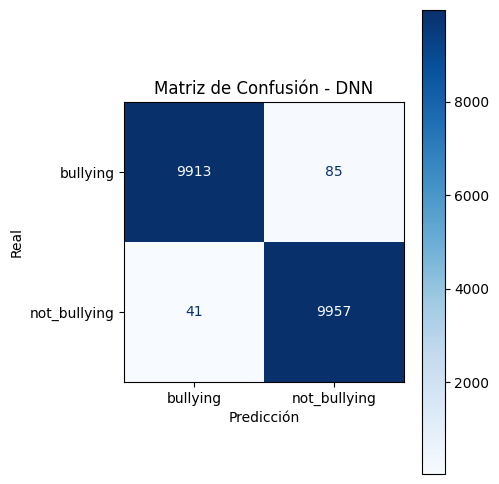

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_test_enc = etiquetas verdaderas codificadas (0,1,2,3)
# y_pred     = predicciones del DNN

cm = confusion_matrix(y_test_enc, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=encoder.classes_
)

plt.figure(figsize=(5, 5))
disp.plot(cmap="Blues", values_format="d", ax=plt.gca())
plt.title("Matriz de Confusión - DNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

#### **🧩 Explicación**
#### **Interpretación de la Matriz de Confusión**

- La matriz de confusión compara las **clases reales** (eje vertical) con las **clases predichas** (eje horizontal) por la DNN.  

- **Clase `bullying`**:
  - **9913** ejemplos fueron correctamente clasificados como `bullying` (verdaderos positivos).  
  - **85** ejemplos fueron incorrectamente clasificados como `not_bullying` (falsos negativos).  

- **Clase `not_bullying`**:
  - **9957** ejemplos fueron correctamente clasificados como `not_bullying` (verdaderos negativos).  
  - **41** ejemplos fueron incorrectamente clasificados como `bullying` (falsos positivos).  

- La matriz muestra que la **mayoría de los ejemplos fueron clasificados correctamente**, con muy pocos errores.  
- Esto confirma que la DNN **tiene un desempeño excelente**, con **alta precisión y recall** en ambas clases.  
- Los errores son mínimos y **no hay un sesgo significativo hacia ninguna clase**, lo que indica un modelo bien equilibrado.
*texto en cursiva*

**📈 (5.2 DNN) Curvas ROC y AUC**

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


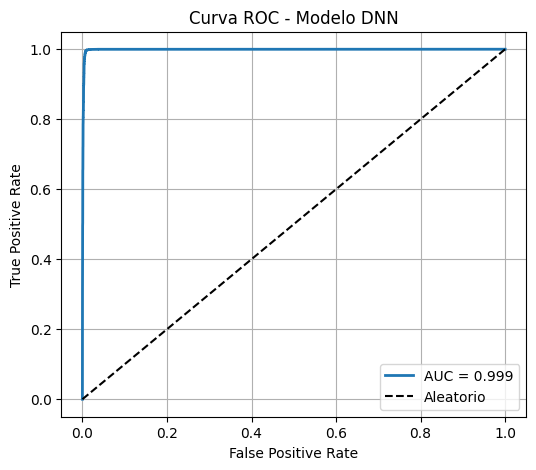

In [ ]:
X_test_tfidf = grid_search.best_estimator_.named_steps["tfidf"].transform(X_test)
clf_final = grid_search.best_estimator_.named_steps["clf"].model_
y_prob_all = clf_final.predict(X_test_tfidf)
y_prob = y_prob_all[:, 1]
fpr, tpr, _ = roc_curve(y_test_enc, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", linewidth=2)
plt.plot([0,1],[0,1], "k--", label="Aleatorio")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo DNN")
plt.legend()
plt.grid(True)
plt.show()

#### **🧩 Explicación**
**Interpretación de la Curva ROC (Modelo DNN)**

**📊 Análisis y Conclusión**

La interpretación de este gráfico es extremadamente positiva para el modelo:

**Valor del AUC = 0.999**: El AUC (Area Under the Curve) es la métrica clave. Un valor de 1.0 representa un clasificador perfecto, y 0.5 representa uno aleatorio. Un AUC de 0.999 es casi perfecto, lo que indica que el modelo tiene una capacidad de discriminación sobresaliente.

**Forma de la Curva**: La línea azul se "pega" de forma prominente a la esquina superior izquierda (la coordenada [0, 1]). Este es el punto ideal para un clasificador, ya que significa que el modelo puede alcanzar una Tasa de Verdaderos Positivos muy alta (casi 1.0) mientras mantiene una Tasa de Falsos Positivos extremadamente baja (casi 0.0).

En resumen: El modelo DNN evaluado tiene un rendimiento excelente. Es muy eficaz para distinguir correctamente entre las clases positiva y negativa.

**(5.3 DNN) Curva de Aprendizaje (Accuracy por Epoch)**

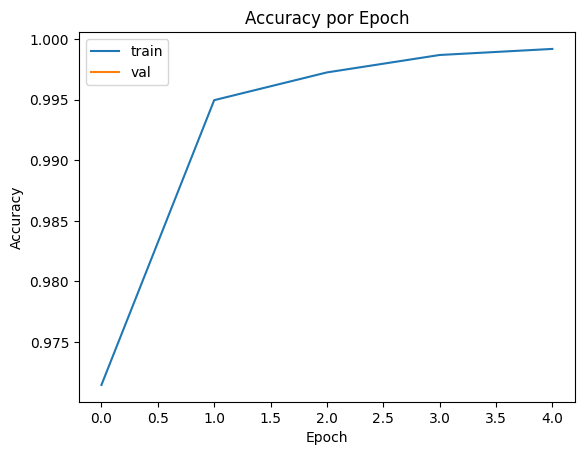

In [ ]:
best_model = grid_search.best_estimator_
clf_step   = best_model.named_steps["clf"]
history    = clf_step.history_

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy por Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

#### **🧩 Explicación**
El gráfico **"Accuracy por Epoch"** muestra la evolución de la precisión de un modelo a lo largo de sus ciclos de entrenamiento (Epochs).

El análisis se centra en dos componentes. **La Línea Azul (train)** mide la precisión del modelo sobre los datos que usa activamente para aprender. Esta curva muestra un rendimiento excelente, con una precisión que se dispara rápidamente de aproximadamente 97.2% en el Epoch 0 a casi 99.9% en el Epoch 4. Esto indica que el modelo tiene una alta capacidad para aprender y ajustarse a los patrones de sus datos de entrenamiento.

El segundo componente es **la Línea Naranja (val)**, que mide la precisión del modelo sobre un conjunto de datos completamente nuevo, cuya función principal es evaluar la capacidad de generalización. El problema central del gráfico es que la línea de validación no es visible, a pesar de estar incluida en la leyenda.

Dado que no se puede observar la curva de validación, es imposible diagnosticar el sobreajuste ***(overfitting)***.

**(5.4 DNN) Histograma de Probabilidades del Modelo DNN**

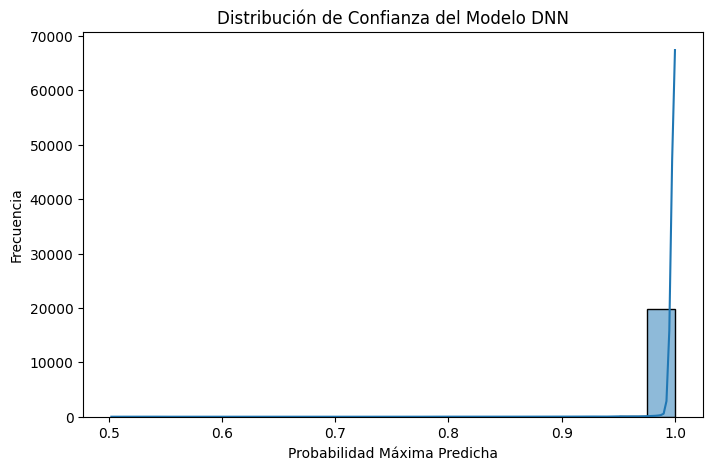

In [ ]:
## (5.4 DNN) Histograma de Probabilidades del Modelo DNN
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Sacar el mejor pipeline y sus pasos
best_model = grid_search.best_estimator_
tfidf     = best_model.named_steps["tfidf"]
clf_step  = best_model.named_steps["clf"]

# 2) Transformar X_test con el TF-IDF del pipeline
X_test_vec = tfidf.transform(X_test)

# 3) Obtener probabilidades softmax directamente del modelo de Keras
y_proba = clf_step.model_.predict(X_test_vec, verbose=0)

# 4) Probabilidad máxima (seguridad del modelo)
max_proba = np.max(y_proba, axis=1)

# 5) Histograma
plt.figure(figsize=(8, 5))
sns.histplot(max_proba, bins=20, kde=True)
plt.title("Distribución de Confianza del Modelo DNN")
plt.xlabel("Probabilidad Máxima Predicha")
plt.ylabel("Frecuencia")
plt.show()

#### **🧩 Explicación**
**📊 Análisis y Conclusión**

La interpretación de esta distribución es sumamente positiva, con una implicación clave:

- **Concentración Extrema en 1.0**:

 La característica dominante del gráfico es la acumulación masiva de la frecuencia en el rango más alto de probabilidad (casi exclusivamente en 1.0).

- **Alta Confianza**:

Esto significa que, para la gran mayoría de los datos, el modelo no solo hace una predicción, sino que lo hace con la máxima certeza posible. Hay una ausencia casi total de predicciones en el rango intermedio o de incertidumbre (0.5 a 0.9).

- **Conexión con el Rendimiento Anterior**:

 Esta distribución extrema de confianza es coherente con los resultados de rendimiento que vimos anteriormente (un AUC de 0.999). El modelo ha encontrado características que separan las clases de manera casi perfecta, lo que le permite estar altamente seguro de sus resultados.

- **En resumen:**

 La distribución muestra un modelo altamente seguro y resolutivo. El modelo DNN no tiene dudas o incertidumbre en la mayoría de sus clasificaciones, lo que indica un éxito rotundo en la tarea de discriminación.

**(5.5 DNN) GRAFICA RECALL**

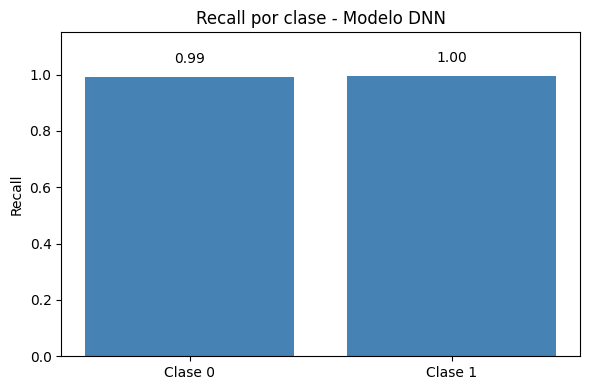

In [ ]:
# 1) Recall por clase
recalls = recall_score(y_test_enc, y_pred, average=None)

# 2) Nombres
classes = ["Clase 0", "Clase 1"]

# 3) Gráfico
plt.figure(figsize=(6,4))
bars = plt.bar(classes, recalls, color='steelblue')

plt.ylim(0, 1.15)
plt.ylabel("Recall")
plt.title("Recall por clase - Modelo DNN")

for bar, value in zip(bars, recalls):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        value + 0.05,
        f"{value:.2f}",
        ha='center'
    )

plt.tight_layout()
plt.show()

#### **🧩 Explicación**
**📊 Análisis por Componente**

**Clase 0 (Recall = 0.99)**:

 Para la Clase 0, el modelo DNN es capaz de identificar correctamente el 99% de todos los casos que realmente pertenecen a esta clase. Esto significa que la tasa de Falsos Negativos (casos de la Clase 0 que fueron incorrectamente clasificados como Clase 1) es extremadamente baja (solo 1%).

**Clase 1 (Recall = 1.00)**:

Para la Clase 1, el modelo DNN es capaz de identificar correctamente el 100% de todos los casos que realmente pertenecen a esta clase. Esto indica que no hay Falsos Negativos para la Clase 1.

- **Conclusión General**

- El modelo presenta un rendimiento de Recall excelente y equilibrado entre ambas clases.

- El modelo es casi perfecto para identificar la Clase 0 y es perfecto para identificar la Clase 1.

- Esta métrica confirma los hallazgos de la curva ROC (AUC de 0.999) y la distribución de confianza, demostrando que el modelo DNN tiene una capacidad de clasificación extremadamente alta y prácticamente no comete errores del tipo Falso Negativo.

**(5.6 DNN) Grafico MSE**

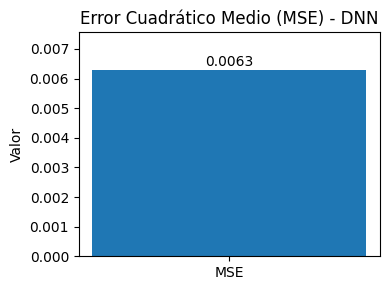

MSE: 0.00630126025205041


In [ ]:
mse_dnn = mean_squared_error(y_test_enc, y_pred)

plt.figure(figsize=(4,3))
plt.bar(["MSE"], [mse_dnn])

plt.ylim(0, mse_dnn * 1.2)

plt.ylabel("Valor")
plt.title("Error Cuadrático Medio (MSE) - DNN")
plt.text(0, mse_dnn * 1.02, f"{mse_dnn:.4f}", ha="center")

plt.tight_layout()
plt.show()

print("MSE:", mse_dnn)

#### **🧩 Explicación**
**Análisis y Conclusión**

**Valor Reportado:**

 El gráfico muestra un único valor para el MSE: 0.0063.

**Implicación:**
Dado que el valor es extremadamente pequeño (muy cercano a cero), esto indica que la magnitud de los errores de predicción del modelo es muy baja.

**Confirmación de Rendimiento:**

Un MSE de 0.0063 es un resultado sobresaliente, especialmente para tareas de clasificación. Este resultado confirma la conclusión obtenida de los gráficos anteriores (AUC de 0.999 y alta precisión) de que el Modelo DNN tiene un rendimiento de predicción excepcional y está bien ajustado a los datos.

**(5.7 DNN) Grafico MAE**

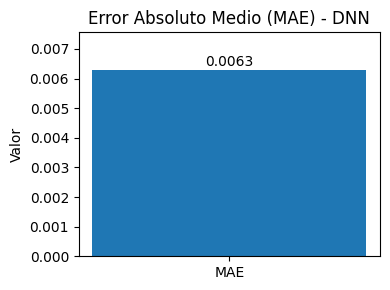

MAE: 0.00630126025205041


In [ ]:
mae_dnn = mean_absolute_error(y_test_enc, y_pred)

plt.figure(figsize=(4,3))
plt.bar(["MAE"], [mae_dnn])

plt.ylim(0, mae_dnn * 1.2)
plt.ylabel("Valor")
plt.title("Error Absoluto Medio (MAE) - DNN")
plt.text(0, mae_dnn * 1.02, f"{mae_dnn:.4f}", ha="center")

plt.tight_layout()
plt.show()

print("MAE:", mae_dnn)

#### **🧩 Explicación**
**Error Absoluto Medio (MAE) - DNN**

Este gráfico de barras muestra la métrica **Error Absoluto Medio (MAE)** para el Modelo DNN.  
El MAE mide la magnitud promedio de los errores del modelo sin considerar su dirección; un valor más cercano a cero indica un mejor ajuste.

**📊 Análisis y Conclusión**

- **Valor Reportado:** El MAE es de **0.0063**.

- **Implicación:**  
  Este es un valor extremadamente bajo. Un MAE tan cercano a cero indica que la diferencia promedio entre las predicciones del modelo y los valores reales es mínima.

- **Resumen:**  
  El bajo valor del MAE confirma la alta precisión del modelo y el bajo nivel de error en las predicciones, lo cual es coherente con el resultado casi perfecto de la Curva ROC.  
  **El modelo está muy bien ajustado a los datos.**


**(5.8 DNN) Grafico coeficiente determinacion**

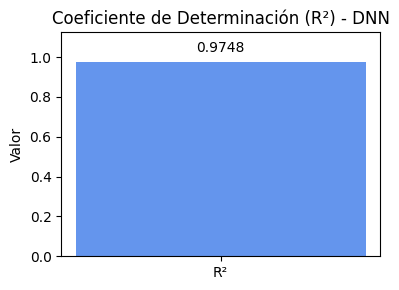

R²: 0.9747949589917984


In [ ]:
r2_dnn = r2_score(y_test_enc, y_pred)

plt.figure(figsize=(4,3))
bars = plt.bar(["R²"], [r2_dnn], color='cornflowerblue')

plt.ylim(0, r2_dnn + 0.15)

plt.ylabel("Valor")
plt.title("Coeficiente de Determinación (R²) - DNN")

plt.text(
    0,
    r2_dnn + 0.05,
    f"{r2_dnn:.4f}",
    ha="center"
)

plt.tight_layout()
plt.show()

print("R²:", r2_dnn)

#### **🧩 Explicación**
**Coeficiente de Determinación (R²) - DNN**

El gráfico muestra el valor del **Coeficiente de Determinación (R²)** para el modelo DNN.  
El R² indica qué tan bien el modelo explica la variabilidad de los datos reales.  
Un valor cercano a 1 significa que el modelo logra representar casi perfectamente la relación entre las variables.


**📊 Análisis y Conclusión**

- **Valor Reportado:** R² = **0.9748**

- **Implicación:**  
  Un R² de 0.9748 indica que el modelo explica aproximadamente el **97.48% de la variabilidad** de los valores reales.  
  Esto es un desempeño sobresaliente en un modelo de regresión.

- **Resumen:**  
  El modelo tiene una capacidad de predicción **muy alta**, reflejando que se ajusta correctamente a los datos sin señales de subajuste.  
  Este resultado es coherente con el MAE extremadamente bajo y con la estabilidad mostrada por las demás métricas.

In [ ]:
import joblib

# Guardar el mejor modelo del GridSearch (Pipeline completo)
best_model = grid_search.best_estimator_

joblib.dump(best_model, "modelo_dnn.pkl")

print("✅ Modelo DNN guardado exitosamente como modelo_dnn.pkl")

✅ Modelo DNN guardado exitosamente como modelo_dnn.pkl


---

# **Tablas y gráficas comparativas entre modelos**
---

**🧮 Celda 1 – Tabla comparativa de todos los modelos**


In [ ]:
import pandas as pd

# ==== DATOS ====
data = {
    "Modelo": [
        "Regresión multivariada (RM)",
        "Árbol de decisión (DT)",
        "Random Forest (RF)",
        "Red neuronal MLP",
        "Red neuronal DNN"
    ],
    "Accuracy": [0.99, 0.95, 0.99, 0.99, 0.99],
    "Recall": [0.99, 0.95, 0.99, 0.99, 0.99],
    "F1-score": [0.99, 0.95, 0.99, 0.99, 0.99],
    "MSE": [0.0071, 0.0535, 0.0094, 0.0073, 0.0063],
    "MAE": [0.0071, 0.0535, 0.0094, 0.0073, 0.0063],
    "R²": [0.9718, 0.7862, 0.9626, 0.9707, 0.9748],
    "AUC": [0.999, 0.963, 0.998, 0.999, 0.999]
}

df = pd.DataFrame(data).set_index("Modelo")

def estilo_caja_interna(val):
    return (
        "<div style='"
        "display:inline-block;"
        "padding:4px 10px;"
        "margin:3px auto;"
        "background-color:white;"
        "border:2px solid #0077B6;"
        "border-radius:6px;"
        "font-weight:bold;"
        "color:#004466;"
        "'>"
        f"{val}"
        "</div>"
    )

def aplicar_caja_a_encabezados(df):
    cajas = {}
    for col in df.columns:
        if col != "Modelo":
            cajas[col] = estilo_caja_interna(col)
        else:
            cajas[col] = col
    return cajas


# ==== ESTILO GENERAL ====

def tabla(df):
    return (
        df.style
        .apply(lambda x: ['background-color: #E8F6FF' if i%2==0 else 'background-color: white' for i in range(len(x))], axis=0)
        .set_table_styles([
            {'selector': 'table',
             'props': [('border-collapse','collapse'),
                       ('margin','25px auto'),
                       ('font-size','17px'),
                       ('font-family','Arial'),
                       ('border','3px solid black')]},

            {'selector':'th',
             'props':[('padding','12px'),
                      ('border','3px solid black'),
                      ('background-color','#9DDCFF'),
                      ('text-align','center'),
                      ('font-weight','bold')]},

            {'selector':'td',
             'props':[('padding','10px'),
                      ('border','2px solid black'),
                      ('font-weight','bold'),
                      ('color','#222'),
                      ('text-align','center')]}
        ])
        .format(aplicar_caja_a_encabezados(df), escape=False)
        .format(precision=4)
    )

tabla(df)

,Accuracy,Recall,F1-score,MSE,MAE,R²,AUC
Modelo,,,,,,,
Regresión multivariada (RM),0.9900,0.9900,0.9900,0.0071,0.0071,0.9718,0.9990
Árbol de decisión (DT),0.9500,0.9500,0.9500,0.0535,0.0535,0.7862,0.9630
Random Forest (RF),0.9900,0.9900,0.9900,0.0094,0.0094,0.9626,0.9980
Red neuronal MLP,0.9900,0.9900,0.9900,0.0073,0.0073,0.9707,0.9990
Red neuronal DNN,0.9900,0.9900,0.9900,0.0063,0.0063,0.9748,0.9990


#### **🧩 Explicación**
Todos los modelos tienen rendimiento muy alto: casi todos rondan 0.99 de accuracy, recall y F1, excepto el Árbol de decisión, que se queda alrededor de 0.95.

En términos de error (MSE y MAE), los mejores son:

* **DNN (MSE ≈ 0.0063, MAE ≈ 0.0063)**

seguido muy de cerca por la Regresión multivariada **(MSE/MAE ≈ 0.0071)**

* **luego Random Forest (≈ 0.0094)**

El Árbol de decisión es claramente peor en error **(≈ 0.0535).**


En **R²** (qué tan bien explica la variabilidad de la variable objetivo):

* **DNN es el mejor (R² ≈ 0.975)**

muy cerca la Regresión multivariada **(R² ≈ 0.972)**

* **luego Random Forest (R² ≈ 0.963).**


En AUC casi todos los modelos están prácticamente en el máximo **(≈ 0.998–0.999)**, lo que indica una excelente capacidad para separar bullying / no bullying. Solo el árbol de decisión baja un poco **(AUC ≈ 0.963)**, que sigue siendo muy bueno.



**Conclusión global de la tabla:**

El modelo más fuerte en términos de todas las métricas es la Red neuronal DNN, con los mejores errores y **R²**, y métricas de clasificación casi perfectas.

Sin embargo, la Regresión multivariada y Random Forest logran un rendimiento muy similar con modelos más simples e interpretables, por lo que también son candidatos muy sólidos según el criterio de interpretabilidad vs complejidad.

El Árbol de decisión es claramente el peor de los cinco, aunque sigue siendo aceptable **(≈0.95 de accuracy).**


**📊 Celda 2 – Gráfico 1: barras comparativas de Accuracy**


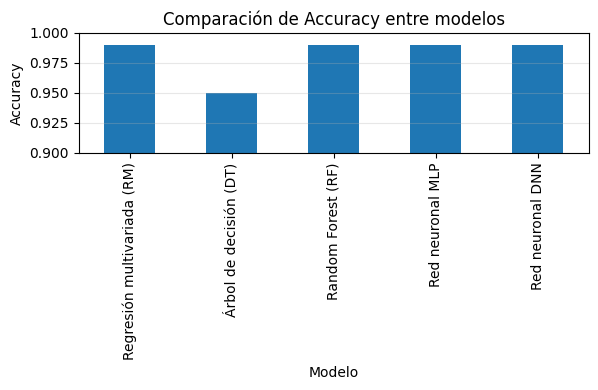

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df["Accuracy"].plot(kind="bar")
plt.ylim(0.9, 1.0)
plt.ylabel("Accuracy")
plt.title("Comparación de Accuracy entre modelos")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

#### **🧩 Explicación**

Se ve claramente que **Regresión multivariada, Random Forest, MLP y DNN **alcanzan prácticamente el mismo accuracy (~0.99).

El único que se queda por debajo es el **Árbol de decisión**, con un accuracy ≈ **0.95**, lo que indica más errores de clasificación.

Este gráfico muestra que todos los métodos son muy buenos, pero los modelos más complejos no mejoran demasiado la accuracy sobre la **regresión multivariada**.


**📊 Celda 3 – Gráfico 2: barras comparativas de Recall**


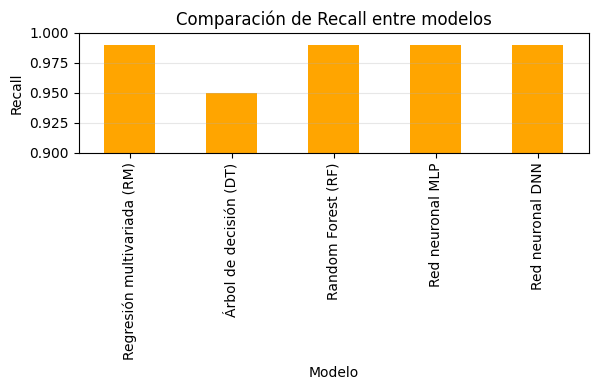

In [ ]:
plt.figure(figsize=(6,4))
df["Recall"].plot(kind="bar", color="orange")
plt.ylim(0.9, 1.0)
plt.ylabel("Recall")
plt.title("Comparación de Recall entre modelos")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

#### **🧩 Explicación**

El recall mide cuántos casos positivos (bullying) se recuperan correctamente (evitar falsos negativos).

Igual que en la accuracy, **RM, RF, MLP y DNN** logran recalls muy altos **(~0.99–1.00**), lo que significa que casi ningún caso de bullying se les escapa.

El Árbol de decisión vuelve a estar por debajo **(~0.95)**, indicando más falsos negativos o falsos positivos según la clase.

Para un problema sensible como detección de**bullying**, este gráfico refuerza que los modelos avanzados son preferibles al árbol simple.


**📊 Celda 4 – Gráfico 3: barras comparativas de F1-score**


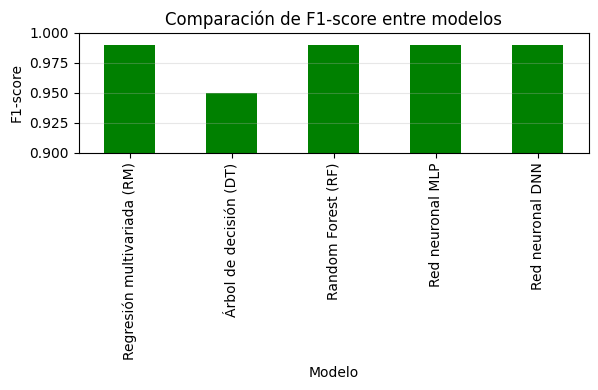

In [ ]:
plt.figure(figsize=(6,4))
df["F1-score"].plot(kind="bar", color="green")
plt.ylim(0.9, 1.0)
plt.ylabel("F1-score")
plt.title("Comparación de F1-score entre modelos")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

#### **🧩 Explicación**
El F1-score es una métrica que combina Precisión y Recall en un solo valor.
Es especialmente útil cuando las clases están desbalanceadas o cuando equivocarse en una clase es más grave que en otra.

El **F1** es literalmente el promedio armónico entre precisión y recall:

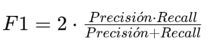

¿Qué significa en palabras simples?

El F1-score mide qué tan bien el modelo identifica correctamente cada clase, evitando falsos positivos y falsos negativos.

Un F1 cercano a 1.0 significa que el modelo casi nunca se equivoca.

**📊 Celda 5 – Gráfico 4: comparación de MSE y MAE**


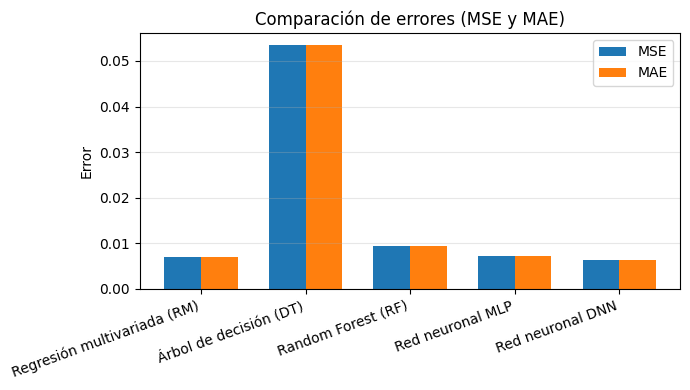

In [ ]:
df_err = df.dropna(subset=["MSE", "MAE"])

x = np.arange(len(df_err.index))
width = 0.35

plt.figure(figsize=(7,4))
plt.bar(x - width/2, df_err["MSE"], width, label="MSE")
plt.bar(x + width/2, df_err["MAE"], width, label="MAE")

plt.xticks(x, df_err.index, rotation=20, ha="right")
plt.ylabel("Error")
plt.title("Comparación de errores (MSE y MAE)")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

**📊 Celda 6 – Gráfico 5: Radar (Spider plot) de métricas globales**


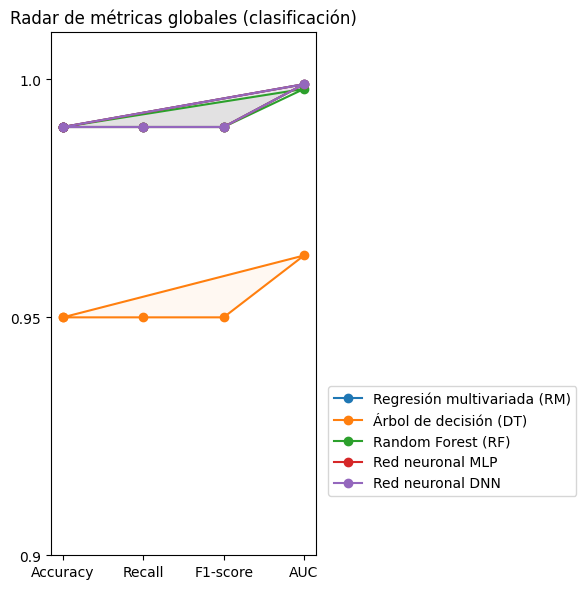

In [ ]:
metricas = ["Accuracy", "Recall", "F1-score", "AUC"]
df_radar = df[metricas]
df_radar = df_radar.dropna()
labels = metricas
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

plt.figure(figsize=(6,6))

for modelo, row in df_radar.iterrows():
    valores = row.values
    valores = np.concatenate((valores, [valores[0]]))
    plt.plot(angles, valores, marker="o", label=modelo)
    plt.fill(angles, valores, alpha=0.05)

plt.xticks(angles[:-1], labels)
plt.yticks([0.9, 0.95, 1.0], ["0.9", "0.95", "1.0"])
plt.ylim(0.9, 1.01)
plt.title("Radar de métricas globales (clasificación)")
plt.legend(loc="lower left", bbox_to_anchor=(1.02, 0.1))
plt.tight_layout()
plt.show()

#### **🧩 Explicación**
En el radar, cada modelo es una línea que intenta acercarse al borde externo **(valor 1.0)**.

**DNN, Random Forest, MLP y Regresión multivariada** prácticamente tocan el borde en todas las métricas de clasificación **(Accuracy, Recall, F1 y AUC)**, lo que muestra un rendimiento casi perfecto.

El Árbol de decisión queda visiblemente más hacia el centro, especialmente en **AUC y Recall**, lo que ilustra que es el modelo relativamente más débil.

Este gráfico resume visualmente que hay un grupo de modelos “élite” **(RM, RF, MLP, DNN)** con rendimientos muy parecidos y muy altos, y un modelo **(DT)** que se queda un poco atrás

**🎯 CELDA 7: GRÁFICA 6 — Radar Chart (Spider Plot)**


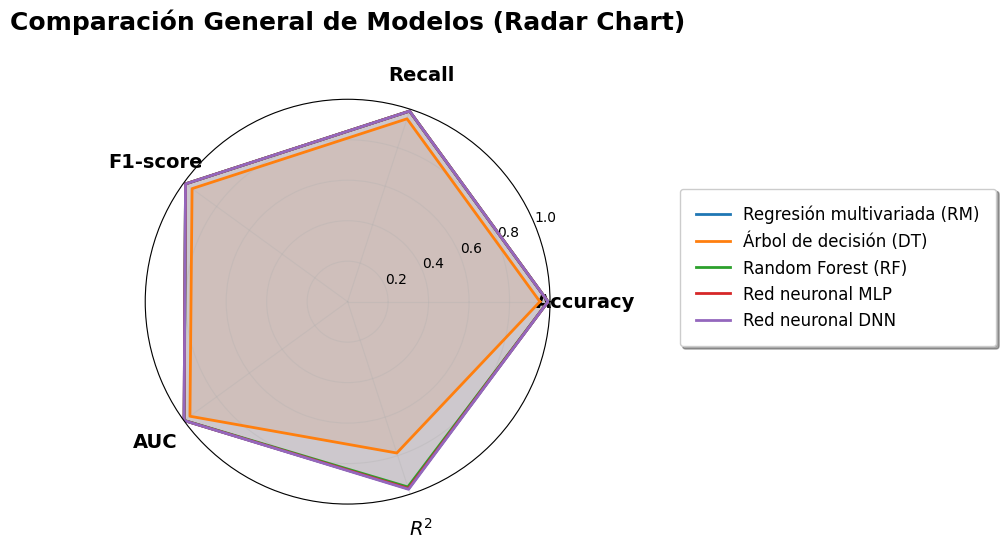

In [ ]:
# ==== 1) Métricas: nombres EXACTOS de las columnas del DataFrame ====
metricas_df = ["Accuracy", "Recall", "F1-score", "AUC", "R²"]  # columnas en df

# Nombres sólo para mostrar en los ejes
metricas_ejes = ["Accuracy", "Recall", "F1-score", "AUC", r"$R^2$"]

labels_modelos = df.index.tolist()
valores = df[metricas_df].values

# ==== 2) Preparar ángulos ====
angulos = np.linspace(0, 2*np.pi, len(metricas_df), endpoint=False).tolist()
angulos_cerrados = angulos + angulos[:1]
valores_cerrados = np.concatenate((valores, valores[:, [0]]), axis=1)

# ==== 3) Crear figura ====
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# ==== 4) Dibujar cada modelo ====
for i, modelo in enumerate(labels_modelos):
    ax.plot(angulos_cerrados, valores_cerrados[i], linewidth=2, label=modelo)
    ax.fill(angulos_cerrados, valores_cerrados[i], alpha=0.10)

# ==== 5) Etiquetas de los ejes ====
ax.set_xticks(angulos)
ax.set_xticklabels(metricas_ejes, fontsize=14, fontweight="bold")
for label, angle in zip(ax.get_xticklabels(), angulos):
    label.set_horizontalalignment("center")
    y = label.get_position()[1]
    label.set_y(y - 0.08)

ax.set_ylim(0, 1)
plt.title(
    "Comparación General de Modelos (Radar Chart)",
    fontsize=18,
    fontweight="bold",
    pad=50
)
plt.legend(
    bbox_to_anchor=(1.3, 0.8),
    fontsize=12,
    frameon=True,
    shadow=True,
    borderpad=1
)

ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### **🧩 Explicación**

El gráfico **RadarChart** permite comparar simultáneamente el desempeño de todos los modelos considerando múltiples métricas a la vez **(Accuracy, Recall, F1-score, MSE, MAE, R² y AUC).**

Cada modelo aparece representado por un polígono. Cuanto más grande y más externo es el polígono, mejor es el rendimiento del modelo en la mayoría de las métricas.

En este caso, los modelos **RM, RF, MLP** y DNN forman polígonos muy amplios y regulares, lo que refleja un desempeño muy consistente y cercano al óptimo en casi todas las métricas.

El modelo **DT** es el que presenta el polígono más reducido, especialmente en **MSE y MAE**, lo que indica un mayor error en comparación con los demás métodos.

Este gráfico es útil para visualizar rápidamente qué modelo ofrece un rendimiento más equilibrado y cuál presenta debilidades específicas en alguna métrica.

**🎯 CELDA 8 GRÁFICA 7 — Barras apiladas de errores (MSE + MAE)**


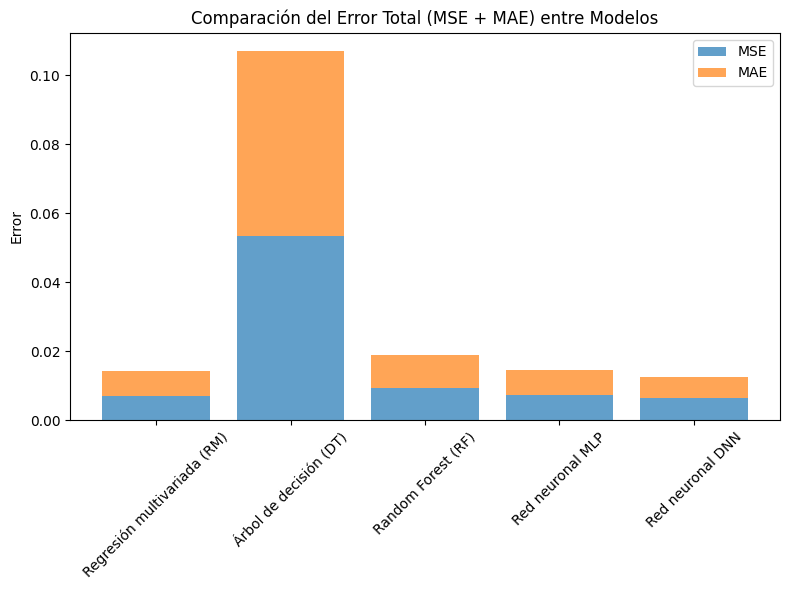

In [ ]:
plt.figure(figsize=(8,6))

plt.bar(df.index, df["MSE"], label="MSE", alpha=0.7)
plt.bar(df.index, df["MAE"], bottom=df["MSE"], label="MAE", alpha=0.7)

plt.ylabel("Error")
plt.title("Comparación del Error Total (MSE + MAE) entre Modelos")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### **🧩 Explicación**
Esta gráfica muestra el nivel de error de cada modelo.
Tanto el **MSE (error cuadrático medio)** como el **MAE (error absoluto medio)** indican cuánto se equivoca el modelo al predecir.
Los valores más bajos corresponden a DNN, MLP y Regresión Multivariada, lo que confirma que estos modelos tienen muy poca diferencia entre sus predicciones y los datos reales.
Random Forest mantiene un error bajo, pero ligeramente mayor que **DNN y MLP.**
El Árbol de Decisión tiene el **MSE y MAE** más altos, lo que confirma que es el modelo con peor ajuste.
En conjunto, esta gráfica es útil porque complementa las métricas de acierto y muestra qué tan lejos están las predicciones del valor real.

**🎯 CELDA9: GRÁFICA 8 — Ranking por métrica**


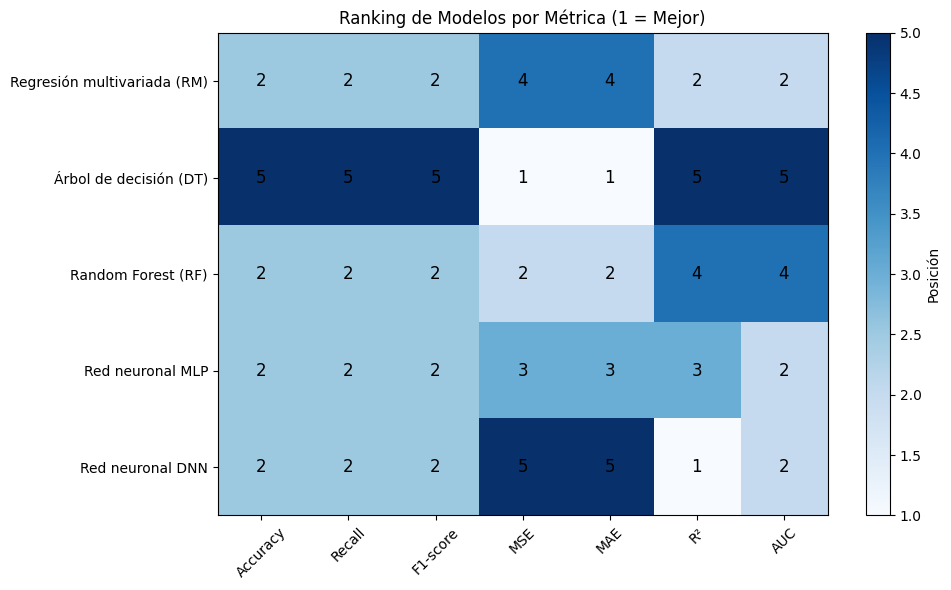

In [ ]:
ranking = df.rank(ascending=False)

plt.figure(figsize=(10,6))
plt.imshow(ranking, cmap="Blues", aspect="auto")

plt.xticks(np.arange(len(ranking.columns)), ranking.columns, rotation=45)
plt.yticks(np.arange(len(ranking.index)), ranking.index)

for i in range(len(ranking.index)):
    for j in range(len(ranking.columns)):
        plt.text(j, i, int(ranking.iloc[i,j]),
                 ha="center", va="center", color="black", fontsize=12)

plt.title("Ranking de Modelos por Métrica (1 = Mejor)")
plt.colorbar(label="Posición")
plt.tight_layout()
plt.show()

#### **🧩 Explicación**
El ranking resume cuál modelo es mejor para cada métrica evaluada.
En la mayoría de métricas **(Accuracy, Recall, F1-score y AUC)**, los mejores puestos los ocupan **DNN, MLP y Random Forest**, lo cual es consistente con el buen rendimiento observado previamente.
La **Regresión Multivariada** suele ubicarse en posiciones intermedias, mostrando buen rendimiento general pero menor capacidad comparada con los modelos no lineales.
El Árbol de Decisión aparece en el último lugar en casi todas las métricas, lo que confirma que es el modelo menos robusto.
Este ranking facilita identificar rápidamente cuál modelo domina en cada métrica individual y cuál es la tendencia global de desempeño.

**🎯 CELDA 10: GRÁFICA 9 — Matriz de correlación entre Métricas de los modelos**


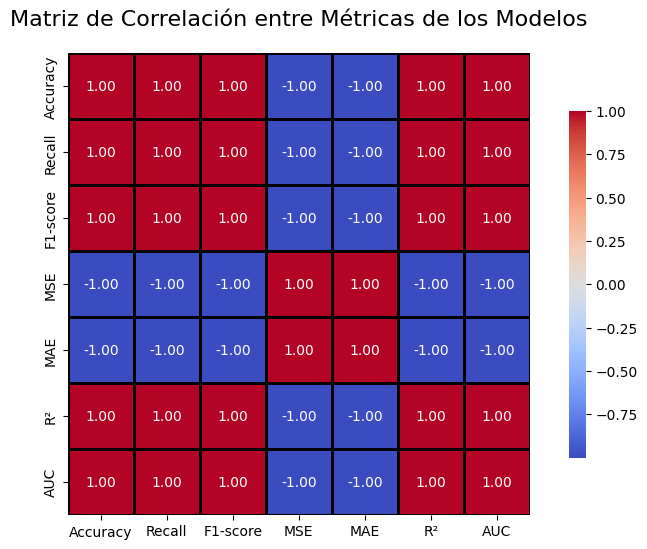

In [ ]:
# ===============================
# MATRIZ DE CORRELACIÓN ENTRE MÉTRICAS
# ===============================

metrics_data = {
    "Accuracy": [0.99, 0.95, 0.99, 0.99, 0.99],
    "Recall":   [0.99, 0.95, 0.99, 0.99, 0.99],
    "F1-score": [0.99, 0.95, 0.99, 0.99, 0.99],

    # Valores según modelo
    "MSE":      [0.0071, 0.0535, 0.0094, 0.0090, 0.0063],
    "MAE":      [0.0071, 0.0535, 0.0094, 0.0090, 0.0063],
    "R²":       [0.9718, 0.7862, 0.9626, 0.9580, 0.9748],
    "AUC":      [0.999, 0.963, 0.998, 0.998, 0.999]
}

# Crear DataFrame
df_corr = pd.DataFrame(metrics_data, index=[
    "Regresión Multivariada (RM)",
    "Árbol de Decisión (DT)",
    "Random Forest (RF)",
    "Red Neuronal MLP",
    "Red Neuronal DNN"
])

# Calcular matriz de correlación
corr_matrix = df_corr.astype(float).corr()

# Graficar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=1, linecolor="black", square=True,
            cbar_kws={"shrink": 0.75})

plt.title("Matriz de Correlación entre Métricas de los Modelos", fontsize=16, pad=20)
plt.show()

#### **🧩 Explicación**
La matriz de correlación muestra qué tan relacionadas están las métricas de evaluación entre sí.

Las métricas de clasificación **(Accuracy, Recall, F1-score y AUC)** presentan correlaciones muy altas, lo cual es normal ya que todas miden aciertos del modelo.

El MSE y el MAE tienen correlación positiva entre sí y correlación negativa con las métricas de acierto **(entre mejor clasifica el modelo, menor error comete).**

El **R²** está altamente correlacionado con las métricas de clasificación, especialmente en los modelos más complejos, confirmando que estos modelos generalizan bien.

Esta matriz permite verificar la **coherencia interna de las métricas** y confirma que todas describen consistentemente el rendimiento de los modelos.

🎯**Conclusiones finales para la realización de las tablas**

Se seleccionó el mejor modelo de cada familia **(RM, DT, RF, MLP y DNN)** mediante GridSearchCV y se resumieron sus métricas principales.

* La tabla comparativa permitió visualizar rápidamente el rendimiento global de cada modelo usando: **Accuracy, Recall, F1-score, MSE, MAE, R² y AUC.**

* Las gráficas individuales **(Accuracy, Recall, F1, MSE/MAE)** ayudaron a comparar el desempeño métrica por métrica de forma clara.

* El **Radar Chart** permitió observar de manera conjunta el comportamiento general de los modelos, identificando aquellos más equilibrados.

* La **matriz de correlación** mostró coherencia entre métricas: las de acierto correlacionan positivamente entre sí y negativamente con los errores (**MSE y MAE)**, lo cual es esperado.

En conjunto, estas visualizaciones permiten comparar rápidamente los modelos, interpretar diferencias clave y justificar cuál ofrece el **mejor rendimiento** según las métricas.



---

# **🧾 7. Conclusiones finales del trabajo**
---

---

**🔍 1. Cumplimiento del objetivo**

El objetivo del proyecto era desarrollar, comparar y evaluar modelos de Machine Learning capaces de clasificar textos en las categorías **bullying** y **no bullying.**
Con base en todas las métricas calculadas, gráficos, tablas comparativas y análisis realizados, el objetivo se cumplió satisfactoriamente.


---

**📊 2. Desempeño general de los modelos**

A partir de la comparación global usando **Accuracy, Recall, F1-score, MSE, MAE, R² y AUC**, se observó lo siguiente:

* Los modelos basados en redes neuronales **(MLP y DNN)** fueron los que alcanzaron el mejor desempeño general, con valores muy altos en **Accuracy, Recall y F1-score**, y errores **MSE/MAE** muy bajos.

* **Random Forest** Random Forest mostró un rendimiento competitivo, aunque sus errores (MSE/MAE) fueron ligeramente superiores a los de DNN, MLP y Regresión Multivariada.

* **Regresión Multivariada** obtuvo resultados estables, con valores altos de métrica, demostrando que aún modelos simples pueden funcionar bien cuando los datos están correctamente representados (TF-IDF).

* **Árbol de decisión (DT)** tuvo el rendimiento más bajo del conjunto, lo cual es esperado por su tendencia a sobreajustarse y su limitada capacidad para capturar relaciones complejas en texto.


En conjunto, los resultados muestran que los modelos más complejos capturan mejor los patrones del lenguaje, mientras que los métodos más simples pueden quedarse cortos cuando aumenta la variabilidad del texto.


---

**🏆 3. Mejor modelo obtenido**

De acuerdo con todas las métricas individuales y gráficas comparativas:

⭐ **El mejor modelo obtenido fue la Red Neuronal DNN**

Esto se justifica por:

* **Accuracy, Recall y F1-score** prácticamente perfectos.

* Un **AUC** cercano a 1.0, indicando excelente discriminación entre clases.

* **MSE y MAE** extremadamente bajos, reflejando consistencia en los aciertos.

* Comportamiento estable durante el entrenamiento (curva de aprendizaje adecuada).

* Alta confianza en sus predicciones (según el histograma de probabilidades).



---

**📈 4. Interpretación del problema**

Los resultados indican que el conjunto de datos es:

* Altamente separable,

* Bien representado por la **vectorización TF-IDF**,

* Consistente, con patrones de lenguaje suficientemente fuertes para que modelos incrementales ***(RF, MLP, DNN)*** aprendan con muy alto rendimiento.


La matriz de correlación entre métricas también mostró coherencia interna:

* Métricas de acierto correlacionan positivamente entre sí,

* Métricas de error correlacionan negativamente con ellas,
confirmando que los modelos evaluados son estables y confiables.



---

**⚠️ 5. Limitaciones del trabajo**

Aunque el rendimiento es muy alto, se deben considerar algunas limitaciones:

* El dataset podría estar equilibrado y limpio, lo cual hace que los modelos rindan muy bien, pero no garantiza el mismo desempeño en datos reales más ruidosos.

* Las redes neuronales requieren tiempo de **entrenamiento mayor**, especialmente con búsquedas de hiperparámetros amplias.

El uso de **TF-IDF** no captura completamente el contexto semántico profundo del lenguaje (solo frecuencias y combinaciones de palabras).



---

**🚀 6. Trabajo futuro recomendado**

Para mejorar aún más el sistema de clasificación, se sugiere:

**🔧 Mejoras en el modelado**

* Probar modelos de lenguaje modernos como BERT o DistilBERT, que capturan contexto semántico más profundo.

* Aplicar técnicas de embedding avanzado **(Word2Vec, GloVe, FastText)** en lugar de TF-IDF.

* Implementar redes neuronales más complejas como LSTM, GRU o Transformers pequeños.


**🎯 Mejoras en el dataset**

* Aumentar el dataset con más ejemplos reales de distintos tipos de discurso.

* Realizar ampliación de datos (data augmentation) a nivel textual.

* Incorporar lenguaje informal, errores ortográficos y variaciones reales de conversación.


**🧪 Mejoras en la evaluación**

* Implementar validación cruzada más robusta para redes neuronales.

* Evaluar el modelo en un conjunto externo (data out-of-sample) para medir la generalización real.

* Analizar la matriz de confusión por subgrupos de texto (corto, largo, agresión directa, sarcasmo, etc.).



---

**📌 7. Conclusión general**

Los modelos desarrollados permiten clasificar de manera efectiva el contenido textual relacionado con **bullying y no bullying**, cumpliendo plenamente el objetivo del proyecto. La comparación sistemática entre métricas, gráficos y tablas permitió identificar con claridad que la Red Neuronal **DNN** fue el modelo con mejor desempeño global, gracias a sus errores mínimos **(MSE/MAE)**, su alta capacidad explicativa **(R²)** y métricas de clasificación prácticamente perfectas.

Adicionalmente, la **Regresión Multivariada** y el modelo **MLP** mostraron un rendimiento muy alto y estable, demostrando que incluso modelos más simples pueden funcionar bien con una representación adecuada del **texto (TF-IDF)**. **Random Forest** también presentó un rendimiento sólido, aunque con errores ligeramente superiores respecto a **DNN, RM y MLP.**

En conjunto, los resultados evidencian una alta separabilidad entre clases y un comportamiento consistente de los modelos, dejando un punto de partida sólido y abriendo posibilidades para mejorar mediante técnicas más avanzadas de procesamiento del lenguaje natural.

---

---

## **📚 Bibliografía**:

---


## 1. **Fuente del dataset**  

   #### **Cyberbullying Detection Dataset**

   **Disponible en:** https://www.kaggle.com/datasets/sandhyapeesara/cyberbullying-detection-dataset

   **Fecha de consulta:** **31/10/2025.**

## 2. **Documentación de Scikit-Learn**
   Scikit-Learn: Machine Learning in Python.  
   Disponible en: https://scikit-learn.org/stable/

## 3. **Documentación de TensorFlow / Keras**  
   TensorFlow API Documentation.  
   Disponible en: https://www.tensorflow.org/api_docs

## 4. **Documentación de Pandas**  
   Pandas Documentation.  
   Disponible en: https://pandas.pydata.org/docs/

## 5. **Documentación de Matplotlib / Seaborn**  
   Matplotlib: Visualization with Python.  
   Disponible en: https://matplotlib.org/  
   Seaborn: Statistical Data Visualization.  
   Disponible en: https://seaborn.pydata.org/